In [98]:

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
import seaborn as sns
from pandas.api.types import CategoricalDtype
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, confusion_matrix, auc
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix



In [99]:


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def get_missing_values_df(df):
    missing_values_df = pd.DataFrame(columns=['year', 'count'] + list(df.columns))
    for year in df['JAHR'].unique():
        year_df = df[df['JAHR'] == year]
        count = len(year_df)
        missing_values = count-year_df.isnull().sum()
        missing_values_df = missing_values_df.append({'year': year, 'count': count, **missing_values}, ignore_index=True)
    return missing_values_df

from IPython.display import HTML

# Define a custom CSS style to make tables horizontally scrollable
css_style = """
<style>
    table.dataframe {
        display: block;
        overflow-x: auto;
    }
</style>
"""

HTML(css_style)


############## R E L E V A N T   C O D E

warnings.filterwarnings("ignore")
data = pd.read_csv('./swiss-hospitals/kzp-2008-2020-timeseries.csv', encoding="ISO-8859-1")
df=data
df3=data
df5=data
df7=data
missing_values_df = pd.DataFrame(columns=['year', 'count'] + list(df.columns))

#create df with most possible non 0 columns per year
# Loop through each year in the 'JAHR' column
for year in df['JAHR'].unique():
    year_df = df[df['JAHR'] == year]
    count = len(year_df)
    #count missing values
    missing_values = year_df.isnull().sum()
    # amount of non missing values
    non_missing_values = count - missing_values
    #adding count
    missing_values_df = missing_values_df.append({'year': year, 'count': count, **non_missing_values}, ignore_index=True)

years = [2014, 2015, 2016, 2017, 2018, 2019, 2020] #years to keep
cols = []
for var in years:
    df_year = missing_values_df[missing_values_df['year'] == var] # only want specified years
    cols.extend([col for col in df_year.columns if (df_year[col] == 0).any()]) # add col names where value=0 to list
cols_to_remove = list(set(cols)) # reduce the list to only include unique values
#print(cols_to_remove)
for var in cols_to_remove:
    if var in df.columns:
        df=df.drop(var, axis=1)
        #print(var,",was dropped")
years_to_drop=[2013,2012,2011,2010,2009,2008]

df=df.drop(df[df['JAHR'].isin(years_to_drop)].index)
df2=df
#onehot encode certain variables
df["Akt"]=df['Akt'].astype('string')
df["Akt"]=df['Akt'].str.split(', ')
Akt_dummies = pd.get_dummies(df['Akt'].explode())
Akt_dummies= Akt_dummies.groupby(level=0).sum()
Akt_dummies.columns= 'Akt_' + Akt_dummies.columns
#print(Akt_dummies)


df["SL"]=df["SL"].fillna("none")
df["SL"]=df['SL'].astype('string')
df["SL"]=df['SL'].str.split(', ')
SL_dummies = pd.get_dummies(df['SL'].explode())
SL_dummies= SL_dummies.groupby(level=0).sum()
SL_dummies=SL_dummies.drop("none", axis=1)
SL_dummies.columns= 'SL_' + SL_dummies.columns
#print(SL_dummies)


df["SA"]=df["SA"].fillna("none")
df["SA"]=df['SA'].astype('string')
df["SA"]=df['SA'].str.split(', ')
SA_dummies = pd.get_dummies(df['SA'].explode())
SA_dummies= SA_dummies.groupby(level=0).sum()
SA_dummies=SA_dummies.drop("none", axis=1)
SA_dummies.columns= 'SA_' + SA_dummies.columns
#print(SA_dummies)

df["WB"]=df["WB"].fillna("none")
df["WB"]=df['WB'].astype('string')
df["WB"]=df['WB'].str.split(', ')
WB_dummies = pd.get_dummies(df['WB'].explode())
WB_dummies= WB_dummies.groupby(level=0).sum()
WB_dummies=WB_dummies.drop("none", axis=1)
WB_dummies.columns= 'WB_' + WB_dummies.columns

add_dummies=pd.get_dummies(df, columns=['Typ', 'KT', 'RForm'])

DF = pd.concat([df2, Akt_dummies, SL_dummies, SA_dummies, WB_dummies, add_dummies], axis=1)
DF=DF.drop(['SA','SL','Akt','Unnamed: 0','WB'], axis=1)
DF = DF.loc[:, ~DF.columns.duplicated()]
print(DF.columns)
#DF[['Typ', 'KT', 'Ort', 'RForm']]=df[['Typ', 'KT', 'Ort', 'RForm']].astype('category')
#DF['JAHR']=DF['JAHR'].astype(CategoricalDtype(categories=[2014, 2015, 2016, 2017, 2018, 2019, 2020],ordered=True))
######################################################################################################################################
# Loop through each year in the 'JAHR' column
missing_values_df2 = pd.DataFrame(columns=['year', 'count'] + list(df3.columns))
for year in df3['JAHR'].unique():
    year_df = df3[df3['JAHR'] == year]
    count = len(year_df)
    #count missing values
    missing_values = year_df.isnull().sum()
    # amount of non missing values
    non_missing_values = count - missing_values
    #adding count
    missing_values_df2 = missing_values_df2.append({'year': year, 'count': count, **non_missing_values}, ignore_index=True)

years = [ 2016, 2017, 2018, 2019, 2020] #years to keep
cols = []
for var in years:
    df_year = missing_values_df2[missing_values_df2['year'] == var] # only want specified years
    cols.extend([col for col in df_year.columns if (df_year[col] == 0).any()]) # add col names where value=0 to list
cols_to_remove2 = list(set(cols)) # reduce the list to only include unique values
#print(cols_to_remove)
for var in cols_to_remove2:
    if var in df3.columns:
        df3=df3.drop(var, axis=1)
        #print(var,",was dropped")
years_to_drop=[2015, 2014 ,2013,2012,2011,2010,2009,2008]

df3=df3.drop(df3[df3['JAHR'].isin(years_to_drop)].index)
df4=df3
df3["Akt"]=df3['Akt'].astype('string')
df3["Akt"]=df3['Akt'].str.split(', ')
Akt_dummies = pd.get_dummies(df3['Akt'].explode())
Akt_dummies= Akt_dummies.groupby(level=0).sum()
Akt_dummies.columns= 'Akt_' + Akt_dummies.columns
#print(Akt_dummies)


df3["SL"]=df3["SL"].fillna("none")
df3["SL"]=df3['SL'].astype('string')
df3["SL"]=df3['SL'].str.split(', ')
SL_dummies = pd.get_dummies(df3['SL'].explode())
SL_dummies= SL_dummies.groupby(level=0).sum()
SL_dummies=SL_dummies.drop("none", axis=1)
SL_dummies.columns= 'SL_' + SL_dummies.columns
#print(SL_dummies)


df3["SA"]=df3["SA"].fillna("none")
df3["SA"]=df3['SA'].astype('string')
df3["SA"]=df3['SA'].str.split(', ')
SA_dummies = pd.get_dummies(df3['SA'].explode())
SA_dummies= SA_dummies.groupby(level=0).sum()
SA_dummies=SA_dummies.drop("none", axis=1)
SA_dummies.columns= 'SA_' + SA_dummies.columns
#print(SA_dummies)

df3["WB"]=df3["WB"].fillna("none")
df3["WB"]=df3['WB'].astype('string')
df3["WB"]=df3['WB'].str.split(', ')
WB_dummies = pd.get_dummies(df3['WB'].explode())
WB_dummies= WB_dummies.groupby(level=0).sum()
WB_dummies=WB_dummies.drop("none", axis=1)
WB_dummies.columns= 'WB_' + WB_dummies.columns
#print(SA_dummies)

df3["LA"]=df3["LA"].fillna("none")
df3["LA"]=df3['LA'].astype('string')
df3["LA"]=df3['LA'].str.split(', ')
LA_dummies = pd.get_dummies(df3['LA'].explode())
LA_dummies= LA_dummies.groupby(level=0).sum()
LA_dummies.columns= 'LA_' + LA_dummies.columns

add_dummies2=pd.get_dummies(df3, columns=['Typ', 'KT', 'RForm'])

DF2 = pd.concat([df4, Akt_dummies, SL_dummies, SA_dummies, WB_dummies, LA_dummies,add_dummies2], axis=1)
DF2=DF2.drop(['SA','SL','Akt','Unnamed: 0','WB','LA'], axis=1)
print(DF2.columns)
DF2 = DF2.loc[:, ~DF2.columns.duplicated()]
####################################################################################################################
missing_values_df3 = pd.DataFrame(columns=['year', 'count'] + list(df5.columns))
# Loop through each year in the 'JAHR' column
for year in df5['JAHR'].unique():
    year_df = df5[df5['JAHR'] == year]
    count = len(year_df)
    #count missing values
    missing_values = year_df.isnull().sum()
    # amount of non missing values
    non_missing_values = count - missing_values
    #adding count
    missing_values_df3 = missing_values_df3.append({'year': year, 'count': count, **non_missing_values}, ignore_index=True)

years = [ 2013,2012,2011,2010] #years to keep
cols = []
for var in years:
    df_year = missing_values_df3[missing_values_df3['year'] == var] # only want specified years
    cols.extend([col for col in df_year.columns if (df_year[col] == 0).any()]) # add col names where value=0 to list
cols_to_remove3 = list(set(cols)) # reduce the list to only include unique values
#print(cols_to_remove)
for var in cols_to_remove3:
    if var in df5.columns:
        df5=df5.drop(var, axis=1)
        #print(var,",was dropped")
years_to_drop=[2015, 2014 ,2009,2008, 2016, 2017, 2018, 2019, 2020]

df5=df5.drop(df5[df5['JAHR'].isin(years_to_drop)].index)
df6=df5
df5["Akt"]=df5['Akt'].astype('string')
df5["Akt"]=df5['Akt'].str.split(', ')
Akt_dummies = pd.get_dummies(df5['Akt'].explode())
Akt_dummies= Akt_dummies.groupby(level=0).sum()
Akt_dummies.columns= 'Akt_' + Akt_dummies.columns
#print(Akt_dummies)


df5["SL"]=df5["SL"].fillna("none")
df5["SL"]=df5['SL'].astype('string')
df5["SL"]=df5['SL'].str.split(', ')
SL_dummies = pd.get_dummies(df5['SL'].explode())
SL_dummies= SL_dummies.groupby(level=0).sum()
SL_dummies=SL_dummies.drop("none", axis=1)
SL_dummies.columns= 'SL_' + SL_dummies.columns
#print(SL_dummies)


df5["SA"]=df5["SA"].fillna("none")
df5["SA"]=df5['SA'].astype('string')
df5["SA"]=df5['SA'].str.split(', ')
SA_dummies = pd.get_dummies(df5['SA'].explode())
SA_dummies= SA_dummies.groupby(level=0).sum()
SA_dummies=SA_dummies.drop("none", axis=1)
SA_dummies.columns= 'SA_' + SA_dummies.columns
#print(SA_dummies)

df5["WB"]=df5["WB"].fillna("none")
df5["WB"]=df5['WB'].astype('string')
df5["WB"]=df5['WB'].str.split(', ')
WB_dummies = pd.get_dummies(df5['WB'].explode())
WB_dummies= WB_dummies.groupby(level=0).sum()
WB_dummies=WB_dummies.drop("none", axis=1)
WB_dummies.columns= 'WB_' + WB_dummies.columns
#print(SA_dummies)

add_dummies3=pd.get_dummies(df5, columns=['Typ', 'KT'])

DF3 = pd.concat([df6, Akt_dummies, SL_dummies, SA_dummies, WB_dummies, add_dummies3], axis=1)
DF3=DF3.drop(['SA','SL','Akt','Unnamed: 0','WB'], axis=1)
print(DF3.columns)
DF3 = DF3.loc[:, ~DF3.columns.duplicated()]
####################################################################################################################
missing_values_df4 = pd.DataFrame(columns=['year', 'count'] + list(df7.columns))
# Loop through each year in the 'JAHR' column
for year in df7['JAHR'].unique():
    year_df = df7[df7['JAHR'] == year]
    count = len(year_df)
    #count missing values
    missing_values = year_df.isnull().sum()
    # amount of non missing values
    non_missing_values = count - missing_values
    #adding count
    missing_values_df4 = missing_values_df4.append({'year': year, 'count': count, **non_missing_values}, ignore_index=True)

years = [2010 ,2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] #years to keep
cols = []
for var in years:
    df_year = missing_values_df4[missing_values_df4['year'] == var] # only want specified years
    cols.extend([col for col in df_year.columns if (df_year[col] == 0).any()]) # add col names where value=0 to list
cols_to_remove4 = list(set(cols)) # reduce the list to only include unique values
#print(cols_to_remove)
for var in cols_to_remove4:
    if var in df7.columns:
        df7=df7.drop(var, axis=1)
        #print(var,",was dropped")
years_to_drop=[2009,2008]

df7=df7.drop(df7[df7['JAHR'].isin(years_to_drop)].index)
df8=df7
df7["Akt"]=df7['Akt'].astype('string')
df7["Akt"]=df7['Akt'].str.split(', ')
Akt_dummies = pd.get_dummies(df7['Akt'].explode())
Akt_dummies= Akt_dummies.groupby(level=0).sum()
Akt_dummies.columns= 'Akt_' + Akt_dummies.columns
#print(Akt_dummies)


df7["SL"]=df7["SL"].fillna("none")
df7["SL"]=df7['SL'].astype('string')
df7["SL"]=df7['SL'].str.split(', ')
SL_dummies = pd.get_dummies(df7['SL'].explode())
SL_dummies= SL_dummies.groupby(level=0).sum()
SL_dummies=SL_dummies.drop("none", axis=1)
SL_dummies.columns= 'SL_' + SL_dummies.columns
#print(SL_dummies)


df7["SA"]=df7["SA"].fillna("none")
df7["SA"]=df7['SA'].astype('string')
df7["SA"]=df7['SA'].str.split(', ')
SA_dummies = pd.get_dummies(df7['SA'].explode())
SA_dummies= SA_dummies.groupby(level=0).sum()
SA_dummies=SA_dummies.drop("none", axis=1)
SA_dummies.columns= 'SA_' + SA_dummies.columns
#print(SA_dummies)

df7["WB"]=df7["WB"].fillna("none")
df7["WB"]=df7['WB'].astype('string')
df7["WB"]=df7['WB'].str.split(', ')
WB_dummies = pd.get_dummies(df7['WB'].explode())
WB_dummies= WB_dummies.groupby(level=0).sum()
WB_dummies=WB_dummies.drop("none", axis=1)
WB_dummies.columns= 'WB_' + WB_dummies.columns
#print(SA_dummies)

add_dummies4=pd.get_dummies(df7, columns=['Typ', 'KT'])

DF4 = pd.concat([df8, Akt_dummies, SL_dummies, SA_dummies, WB_dummies,add_dummies4], axis=1)
DF4=DF4.drop(['SA','SL','Akt','Unnamed: 0','WB'], axis=1)
print(DF4.columns)
DF4 = DF4.loc[:, ~DF4.columns.duplicated()]


Index(['JAHR', 'KT', 'Inst', 'Adr', 'Ort', 'Typ', 'AnzStand', 'RForm',
       'PtageStatMST', 'AustStatMST',
       ...
       'KT_TI', 'KT_UR', 'KT_VD', 'KT_VS', 'KT_ZG', 'KT_ZH', 'RForm_R1',
       'RForm_R2', 'RForm_R3', 'RForm_R4'],
      dtype='object', length=161)
Index(['JAHR', 'KT', 'Inst', 'Adr', 'Ort', 'Typ', 'AnzStand', 'RForm',
       'AmbKonsT', 'PtageStatMST',
       ...
       'KT_TI', 'KT_UR', 'KT_VD', 'KT_VS', 'KT_ZG', 'KT_ZH', 'RForm_R1',
       'RForm_R2', 'RForm_R3', 'RForm_R4'],
      dtype='object', length=319)
Index(['JAHR', 'KT', 'Inst', 'Adr', 'Ort', 'Typ', 'AnzStand', 'PtageStatT',
       'AustStatT', 'NeugStatT',
       ...
       'KT_SH', 'KT_SO', 'KT_SZ', 'KT_TG', 'KT_TI', 'KT_UR', 'KT_VD', 'KT_VS',
       'KT_ZG', 'KT_ZH'],
      dtype='object', length=296)
Index(['JAHR', 'KT', 'Inst', 'Adr', 'Ort', 'Typ', 'AnzStand', 'Ops', 'Gebs',
       'CMIb',
       ...
       'KT_SH', 'KT_SO', 'KT_SZ', 'KT_TG', 'KT_TI', 'KT_UR', 'KT_VD', 'KT_VS',
       'KT_ZG', 'KT_

In [100]:


#this was just to visualize and get a better grip on possible dependancies of the data

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Create an empty DataFrame to store the results
missing_values_df = pd.DataFrame(columns=['year', 'count'] + list(DF.columns))

# Loop through each year in the 'year' column
for year in DF['JAHR'].unique():
    # Select the rows for the current year
    year_df = DF[DF['JAHR'] == year]
    # Count the number of entries for the current year
    count = len(year_df)
    # Count the number of missing values in each column
    missing_values = year_df.isnull().sum()
    # Add a row to the results DataFrame
    missing_values_df = missing_values_df.append({'year': year, 'count': count, **missing_values}, ignore_index=True)

# Set the 'year' column as the index
#missing_values_df.set_index('year', inplace=True)

# Display the results
#print(missing_values_df)
missing_values_df
#anzahl missing values pro zeile; optimum ist 0

pd.set_option('display.max_columns', None)

In [101]:
#this was just to visualize and get a better grip on possible dependancies of the data

columns = ['Akt_A', 'Akt_B', 'Akt_P', 'Akt_R']
other_columns = [col for col in DF.columns if col not in columns]
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020]

result = pd.DataFrame(columns=['combination', 'year'] + other_columns)
for column in columns:
    for year in years:
        mask = (DF[column] == 1) & (DF['JAHR'] == year)
        missing_values = DF.loc[mask, other_columns].isnull().sum()
        result = result.append({'combination': column, 'year': year, **missing_values}, ignore_index=True)

result = result.set_index(['combination', 'year'])
result

JAHR KT Inst Adr Ort Typ AnzStand RForm PtageStatMST  \
combination year                                                        
Akt_A       2014    0  0    0   8   0   0        0     0            0   
            2015    0  0    0   7   0   0        0     0            0   
            2016    0  0    0   4   0   0        0     0            0   
            2017    0  0    0   4   0   0        0     0            1   
            2018    0  0    0   4   0   0        0     0            3   
            2019    0  0    0   4   0   0        0     0            1   
            2020    0  0    0   3   0   0        0     0            1   
Akt_B       2014    0  0    0   0   0   0        0     0            4   
            2015    0  0    0   0   0   0        0     0            4   
            2016    0  0    0   0   0   0        0     0            0   
            2017    0  0    0   0   0   0        0     0            0   
            2018    0  0    0   0   0   0        0     0            0   
            2019    0  0    0   0   0   0        0     0            1   
            2020    0  0    0   0   0   0        0     0            1   
Akt_P       2014    0  0    0   7   0   0        0     0            0   
            2015    0  0    0   7   0   0        0     0            0   
            2016    0  0    0   7   0   0        0     0            0   
            2017    0  0    0   6   0   0        0     0            0   
            2018    0  0    0   6   0   0        0     0            0   
            2019    0  0    0   5   0   0        0     0            0   
            2020    0  0    0   4   0   0        0     0            0   
Akt_R       2014    0  0    0   4   0   0        0     0            1   
            2015    0  0    0   3   0   0        0     0            0   
            2016    0  0    0   3   0   0        0     0            0   
            2017    0  0    0   4   0   0        0     0            0   
            2018    0  0    0   4   0   0        0     0            0   
            2019    0  0    0   3   0   0        0     0            2   
            2020    0  0    0   1   0   0        0     0            0   

                 AustStatMST NeugStatMST Ops Gebs CMIb CMIn pPatWAU pPatWAK  \
combination year                                                              
Akt_A       2014           0           0   1    2   23   23       0       0   
            2015           0           0   2    2   28   28       0       0   
            2016           0           0   0    0   25   25       0       0   
            2017           1           1   1    1   25   25       1       1   
            2018           3           3   2    2   26   26       3       3   
            2019           1           1   0    0   25   25       1       1   
            2020           1           1   0    0   27   27       1       1   
Akt_B       2014           4           4   0    0    4    4       4       4   
            2015           4           4   1    1    4    4       4       4   
            2016           0           0   0    0    0    0       0       0   
            2017           0           0   0    0    0    0       0       0   
            2018           0           0   0    0    0    0       0       0   
            2019           1           1   1    1    1    1       1       1   
            2020           1           1   0    0    1    1       1       1   
Akt_P       2014           0           0   0    0   54   54       0       0   
            2015           0           0   0    0   53   53       0       0   
            2016           0           0   0    0   55   55       0       0   
            2017           0           0   0    0   55   55       0       0   
            2018           0           0   0    0   56   56       0       0   
            2019           0           0   0    0   55   55       0       0   
            2020           0           0   0    0   55   55       0       0   
Akt_R    

In [102]:
#this was just to visualize and get a better grip on possible dependancies of the data
columns = ['Akt_A', 'Akt_B', 'Akt_P', 'Akt_R']
other_columns = [col for col in DF.columns if col not in columns]
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020]

result = pd.DataFrame(columns=['combination', 'year', 'max_values'] + other_columns)
for column in columns:
    for year in years:
        mask = (DF[column] == 1) & (DF['JAHR'] == year)
        max_values = mask.sum()
        missing_values = DF.loc[mask, other_columns].isnull().sum()
        result = result.append({'combination': column, 'year': year, 'max_values': max_values, **missing_values}, ignore_index=True)

result = result.set_index(['combination', 'year'])
result

max_values JAHR KT Inst Adr Ort Typ AnzStand RForm  \
combination year                                                      
Akt_A       2014        169    0  0    0   8   0   0        0     0   
            2015        170    0  0    0   7   0   0        0     0   
            2016        166    0  0    0   4   0   0        0     0   
            2017        165    0  0    0   4   0   0        0     0   
            2018        165    0  0    0   4   0   0        0     0   
            2019        166    0  0    0   4   0   0        0     0   
            2020        168    0  0    0   3   0   0        0     0   
Akt_B       2014         18    0  0    0   0   0   0        0     0   
            2015         18    0  0    0   0   0   0        0     0   
            2016         14    0  0    0   0   0   0        0     0   
            2017         15    0  0    0   0   0   0        0     0   
            2018         15    0  0    0   0   0   0        0     0   
            2019         17    0  0    0   0   0   0        0     0   
            2020         15    0  0    0   0   0   0        0     0   
Akt_P       2014         76    0  0    0   7   0   0        0     0   
            2015         76    0  0    0   7   0   0        0     0   
            2016         77    0  0    0   7   0   0        0     0   
            2017         76    0  0    0   6   0   0        0     0   
            2018         78    0  0    0   6   0   0        0     0   
            2019         76    0  0    0   5   0   0        0     0   
            2020         76    0  0    0   4   0   0        0     0   
Akt_R       2014         93    0  0    0   4   0   0        0     0   
            2015         94    0  0    0   3   0   0        0     0   
            2016         96    0  0    0   3   0   0        0     0   
            2017         96    0  0    0   4   0   0        0     0   
            2018         95    0  0    0   4   0   0        0     0   
            2019         93    0  0    0   3   0   0        0     0   
            2020         88    0  0    0   1   0   0        0     0   

                 PtageStatMST AustStatMST NeugStatMST Ops Gebs CMIb CMIn  \
combination year                                                           
Akt_A       2014            0           0           0   1    2   23   23   
            2015            0           0           0   2    2   28   28   
            2016            0           0           0   0    0   25   25   
            2017            1           1           1   1    1   25   25   
            2018            3           3           3   2    2   26   26   
            2019            1           1           1   0    0   25   25   
            2020            1           1           1   0    0   27   27   
Akt_B       2014            4           4           4   0    0    4    4   
            2015            4           4           4   1    1    4    4   
            2016            0           0           0   0    0    0    0   
            2017            0           0           0   0    0    0    0   
            2018            0           0           0   0    0    0    0   
            2019            1           1           1   1    1    1    1   
            2020            1           1           1   0    0    1    1   
Akt_P       2014            0           0           0   0    0   54   54   
            2015            0           0           0   0    0   53   53   
            2016            0           0           0   0    0   55   55   
            2017            0           0           0   0    0   55   55   
            2018            0           0           0   0    0   56   56   
            2019            0           0           0   0    0   55   55   
            2020            0           0           0   0    0   55   55   
Akt_R       2014            1           1           1   2    3   61   61   
            2015            0           0           0   2    3

In [103]:
#this was just to visualize and get a better grip on possible dependancies of the data
pd.DataFrame(DF.groupby(['Akt_A', 'Akt_B', 'Akt_P', 'Akt_R']).size(), columns=['Count']).reset_index()

,Akt_A,Akt_B,Akt_P,Akt_R,Count
0,0,0,0,1,339
1,0,0,1,0,325
2,0,0,1,1,34
3,0,1,0,0,112
4,1,0,0,0,792
5,1,0,0,1,201
6,1,0,1,0,95
7,1,0,1,1,81


In [104]:
############## R E L E V A N T   C O D E
#this code replaces missing values per measured metric, if there is a measurement in the same metric, but in a different category(meaning a different suffix)

list_of_fixable = ['PtageStatMS', 'AustStatMS', 'BettenStat', 'DADStatMS', 'KostAmb', 'KostOKPAmb', 'KostStat', 'KostKVGStat', 'AnlKVGStat', 'KostZvOKPStat', 'AnlZvOKPStat', 'ErlOKPAmb', 'ErlKVGStat']
list_of_bools = ['Akt_A', 'Akt_B', 'Akt_P', 'Akt_R']
list_of_fixable_A = [element + 'A' for element in list_of_fixable]
list_of_fixable_P = [element + 'P' for element in list_of_fixable]
list_of_fixable_R = [element + 'R' for element in list_of_fixable]
list_of_fixable_B = [element + 'A' for element in list_of_fixable]
matrix_with_indices = np.zeros((len(DF), len(list_of_fixable)))
for var in range(len(list_of_fixable)):
    for i in range(len(DF)):
        if DF['Akt_A'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_A[var]][i+1819]):
            matrix_with_indices[i,var] += 1
        elif DF['Akt_P'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_P[var]][i+1819]):
            matrix_with_indices[i,var] += 1
        elif DF['Akt_R'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_R[var]][i+1819]):
            matrix_with_indices[i,var] += 1
        elif DF['Akt_B'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_B[var]][i+1819]):
            matrix_with_indices[i,var] += 1
        if not ((DF['Akt_A'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_A[var]][i+1819])) or (DF['Akt_P'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_P[var]][i+1819])) or (DF['Akt_R'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_R[var]][i+1819])) or (DF['Akt_B'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_B[var]][i+1819]))):
            matrix_with_indices[i,var] -= 0
np.set_printoptions(threshold=np.inf)
print(matrix_with_indices)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [105]:
############## R E L E V A N T   C O D E


for var in range(len(list_of_fixable)):
    for i in range(len(DF)):
        if matrix_with_indices[i,var] == 1:
            if pd.isnull(DF.loc[i+1819, list_of_fixable_A[var]]):
                DF.loc[i+1819, list_of_fixable_A[var]] = 0
            if pd.isnull(DF.loc[i+1819, list_of_fixable_P[var]]):
                DF.loc[i+1819, list_of_fixable_P[var]] = 0
            if pd.isnull(DF.loc[i+1819, list_of_fixable_R[var]]):
                DF.loc[i+1819, list_of_fixable_R[var]] = 0
            if pd.isnull(DF.loc[i+1819, list_of_fixable_B[var]]):
                DF.loc[i+1819, list_of_fixable_B[var]] = 0
pd.set_option('display.max_columns', None)
DF.head(15)

,JAHR,KT,Inst,Adr,Ort,Typ,AnzStand,RForm,PtageStatMST,AustStatMST,NeugStatMST,Ops,Gebs,CMIb,CMIn,pPatWAU,pPatWAK,pPatLKP,pPatHOK,PersA,PersP,PersMT,PersT,StdBelA,StdBelP,AwBesold,AwInvest,AwSonst,AwT,EtMedL,EtSonst,EtSubv,FiErg,PtageStatMSA,AustStatMSA,BettenStatA,DADStatMSA,pBettenBelStatA,KostAmbA,KostOKPAmbA,KostStatA,KostKVGStatA,AnlKVGStatA,KostZvOKPStatA,AnlZvOKPStatA,ErlOKPAmbA,ErlKVGStatA,ErlKVGStatVA,ErlZvOKPStatA,ErlZvOKPStatVA,PtageStatMSP,AustStatMSP,BettenStatP,DADStatMSP,pBettenBelStatP,KostAmbP,KostOKPAmbP,KostStatP,KostKVGStatP,AnlKVGStatP,KostZvOKPStatP,AnlZvOKPStatP,ErlOKPAmbP,ErlKVGStatP,ErlKVGStatVP,ErlZvOKPStatP,ErlZvOKPStatVP,PtageStatMSR,AustStatMSR,BettenStatR,DADStatMSR,pBettenBelStatR,KostAmbR,KostOKPAmbR,KostStatR,KostKVGStatR,AnlKVGStatR,KostZvOKPStatR,AnlZvOKPStatR,ErlOKPAmbR,ErlKVGStatR,ErlKVGStatVR,ErlZvOKPStatR,ErlZvOKPStatVR,PtageStatMSB,AustStatMSB,BettenStatB,DADStatMSB,pBettenBelStatB,KostAmbB,KostOKPAmbB,KostStatB,KostKVGStatB,AnlKVGStatB,KostZvOKPStatB,AnlZvOKPStatB,ErlOKPAmbB,ErlKVGStatB,ErlKVGStatVB,ErlZvOKPStatB,ErlZvOKPStatVB,Akt_A,Akt_B,Akt_P,Akt_R,SL_IPS,SL_NF,SA_Angio,SA_CC,SA_CT,SA_Dia,SA_LB,SA_Lito,SA_MRI,SA_PET,WB_Arzt,WB_BGs,WB_MSt,Typ_K111,Typ_K112,Typ_K121,Typ_K122,Typ_K123,Typ_K211,Typ_K212,Typ_K221,Typ_K231,Typ_K232,Typ_K233,Typ_K234,Typ_K235,KT_AG,KT_AI,KT_AR,KT_BE,KT_BL,KT_BS,KT_FR,KT_GE,KT_GL,KT_GR,KT_JU,KT_LU,KT_NE,KT_NW,KT_OW,KT_SG,KT_SH,KT_SO,KT_SZ,KT_TG,KT_TI,KT_UR,KT_VD,KT_VS,KT_ZG,KT_ZH,RForm_R1,RForm_R2,RForm_R3,RForm_R4
1819,2014,AG,Kantonsspital Aarau AG,Tellstrasse 15,5000 Aarau,K112,1.0,R1,159012.0,26426.0,1405.0,17.0,5.0,1.150,1.134,0.65,11.46,17.04,92.94,574.68,1350.82,343.28,3208.25,0.0,0.0,373864723.0,38427832.0,178070865.0,591171786.0,509389867.0,35835673.0,8767870.0,-30823598.0,159012.0,26426.0,507.000000,6.0,82.9,211143508.0,211143508.0,372087665.0,265237018.0,29742928.0,85602605.0,7978552.0,0.0,216480401.0,56.6,82930175.0,75.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1820,2014,AG,Kantonsspital Baden AG,Im Ergel,5404 Baden,K112,4.0,R1,106526.0,18594.0,1542.0,8.0,6.0,0.928,0.922,0.61,4.47,20.76,95.52,278.23,734.76,194.12,1706.80,9695.0,0.0,184347426.0,15677737.0,88457963.0,298407910.0,284508743.0,22932042.0,4462063.0,23736533.0,106526.0,18594.0,356.224657,5.7,76.8,93247547.0,88259750.0,199956216.0,139246935.0,18481278.0,43304170.0,5778606.0,85315452.0,125571708.0,50.7,39294016.0,51.9,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1821,2014,AG,Hirslanden Klinik Aarau,Schänisweg 1,5000 Aarau,K112,1.0,R1,47599.0,9921.0,674.0,7.0,2.0,1.196,1.182,0.46,17.80,48.99,91.86,10.94,304.23,69.77,535.88,97652.0,18950.0,54866431.0,25470066.0,52896703.0,133234031.0,131602067.0,8572204.0,114081.0,7054321.0,47599.0,9921.0,143.189041,4.8,85.5,24950577.0,22775938.0,107415510.0,46008139.0,3768132.0,54510578.0,4555482.0,18770953.0,52637728.0,51.0,57058755.0,51.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0,0,0,1,0,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1822,2014,AG,Gesundheitszentrum Fricktal,Riburgerstrasse 12,4310 Rheinfelden,K121,3.0,R1,35356.0,7666.0,382.0,6.0,3.0,0.795,0.745,7.04,7.57,22.64,90.05,74.90,229.13,59.45,535.03,0.0,0.0,58322403.0,4251881.0,22452229.0,85026513.0,79896871.0,5712222.0,11

In [106]:
############## R E L E V A N T   C O D E

RowsDF=[24,28,30,32]
def drop_most_missing(df, rows):
    complete_dfs = []
    dropped_columns=[]
    for i in range(len(df.columns)):
        col_with_most_missing = df.isnull().sum().idxmax()
        df = df.drop(col_with_most_missing, axis=1)
        print(f"Dropped column: {col_with_most_missing}")
        dropped_columns.append(col_with_most_missing)
        print(f"New shape: {df.shape}")
        complete_rows = df.dropna()
        print(f"Shape with complete rows only: {complete_rows.shape}")
        if i in rows:
            complete_dfs.append(complete_rows)
        print(i)
    return complete_dfs, dropped_columns

complete_dfs, dropped_columns = drop_most_missing(DF, RowsDF)
newdf = complete_dfs[0]
newdf2 = complete_dfs[1]
newdf3 = complete_dfs[2]
newdf4 = complete_dfs[3]

Dropped column: ErlZvOKPStatVB
New shape: (1979, 160)
Shape with complete rows only: (0, 160)
0
Dropped column: ErlKVGStatVB
New shape: (1979, 159)
Shape with complete rows only: (0, 159)
1
Dropped column: DADStatMSB
New shape: (1979, 158)
Shape with complete rows only: (0, 158)
2
Dropped column: PtageStatMSB
New shape: (1979, 157)
Shape with complete rows only: (0, 157)
3
Dropped column: AustStatMSB
New shape: (1979, 156)
Shape with complete rows only: (0, 156)
4
Dropped column: pBettenBelStatB
New shape: (1979, 155)
Shape with complete rows only: (0, 155)
5
Dropped column: BettenStatB
New shape: (1979, 154)
Shape with complete rows only: (0, 154)
6
Dropped column: KostAmbB
New shape: (1979, 153)
Shape with complete rows only: (0, 153)
7
Dropped column: KostOKPAmbB
New shape: (1979, 152)
Shape with complete rows only: (0, 152)
8
Dropped column: KostStatB
New shape: (1979, 151)
Shape with complete rows only: (0, 151)
9
Dropped column: KostKVGStatB
New shape: (1979, 150)
Shape with comp

Dropped column: Typ_K212
New shape: (1979, 36)
Shape with complete rows only: (1979, 36)
124
Dropped column: Typ_K221
New shape: (1979, 35)
Shape with complete rows only: (1979, 35)
125
Dropped column: Typ_K231
New shape: (1979, 34)
Shape with complete rows only: (1979, 34)
126
Dropped column: Typ_K232
New shape: (1979, 33)
Shape with complete rows only: (1979, 33)
127
Dropped column: Typ_K233
New shape: (1979, 32)
Shape with complete rows only: (1979, 32)
128
Dropped column: Typ_K234
New shape: (1979, 31)
Shape with complete rows only: (1979, 31)
129
Dropped column: Typ_K235
New shape: (1979, 30)
Shape with complete rows only: (1979, 30)
130
Dropped column: KT_AG
New shape: (1979, 29)
Shape with complete rows only: (1979, 29)
131
Dropped column: KT_AI
New shape: (1979, 28)
Shape with complete rows only: (1979, 28)
132
Dropped column: KT_AR
New shape: (1979, 27)
Shape with complete rows only: (1979, 27)
133
Dropped column: KT_BE
New shape: (1979, 26)
Shape with complete rows only: (197

In [107]:
############## R E L E V A N T   C O D E

#Lasso Regression

LR1df = newdf.drop(newdf.iloc[:,33:75], axis=1)
#print(LR1df)

#one hot encoding category
data_encoded = pd.get_dummies(newdf, columns=["KT", "Typ", "RForm"])

#print(data_encoded)

#split into label  and feature
X = data_encoded.drop(newdf.loc[:,"AwBesold":"FiErg"], axis=1)
y = data_encoded["FiErg"]

#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#isNum = X.select_dtypes(include=numerics)
#print(isNum)

#Exclude unique Strings
X = X.drop(X.iloc[:,1:4], axis=1)

#print(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set size: {}, test set size: {}'.format(len(X_train), len(X_test)))

#print(X_train)
#print(y_train)
#print(X_test)
#print(y_test)

# Scale the data using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
 
# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
 
# Evaluate model performance on test set
y_pred = lasso.predict(X_test)
 
# Model Score
print("Model Score: ", lasso.score(X_test, y_test))
 
# Lasso Coefficient
lasso.coef_


Training set size: 673, test set size: 169
Model Score:  0.244904970619494


array([-1.78019034e+06, -4.47376085e+05,  1.29314419e+07, -5.83426618e+06,
        3.52682330e+06,  2.49825090e+06, -4.78232611e+06, -2.46752746e+06,
        2.87254799e+06,  6.61243682e+05,  1.24556532e+05, -2.97683284e+05,
       -1.13444631e+06, -1.42660222e+07,  4.83217585e+07,  1.06907824e+07,
       -6.13650702e+07, -1.71536263e+06, -5.66074887e+06,  3.31013236e+07,
       -1.52840120e+07, -7.80330706e+06, -1.22275050e+06, -3.53621521e+03,
        2.94176327e+06, -5.85511265e+06,  1.52601170e+07, -3.75551318e+07,
       -7.63785816e+06, -6.06031353e+05,  1.28648066e+06,  7.62248597e+06,
        2.13978951e+07, -7.85814634e+04, -5.71850381e+06,  5.63382675e+05,
       -5.58765058e+06,  3.33443279e+06,  1.34517440e+06,  1.60152073e+05,
        5.08983891e+05, -3.82904440e+06,  1.09470172e+07,  1.33720913e+06,
       -3.23385177e+06,  6.58167972e+05,  7.31455979e+05,  5.17744359e+06,
       -1.43269013e+07, -3.63102747e+05, -1.92435420e+05, -2.39137236e+07,
       -2.06697173e+06, -

In [108]:
############## R E L E V A N T   C O D E
#one hot encoding category
data_encoded = pd.get_dummies(newdf, columns=["KT", "Typ", "RForm"])

#print(data_encoded)

#split into label  and feature
X = data_encoded.drop("FiErg", axis=1)
y = data_encoded["FiErg"]


#Exclude Strings
X = X.drop(X.iloc[:,1:4], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set size: {}, test set size: {}'.format(len(X_train), len(X_test)))

#print(X_train)
#print(y_train)
#print(X_test)
#print(y_test)

# Scale the data using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
 
# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
 
# Evaluate model performance on test set
y_pred = lasso.predict(X_test)
 
# Model Score
print("Model Score: ", lasso.score(X_test, y_test))
 
# Lasso Coefficient
lasso.coef_


Training set size: 673, test set size: 169
Model Score:  0.4140621302168457


array([-1.78596729e+06, -7.06233048e+05, -1.77590721e+06, -2.50040003e+06,
        1.91131158e+06,  6.40903353e+05, -1.91144367e+06, -2.89692646e+06,
        3.68834584e+06,  4.58345402e+05,  6.65683562e+04, -3.53443260e+04,
       -1.66787353e+06, -1.33031601e+07,  5.29901349e+07,  1.65504178e+07,
       -4.06465511e+07, -5.20563771e+05,  6.63530727e+06, -1.35515415e+07,
       -5.22924481e+06, -3.22326174e+06, -6.71903703e+07,  5.67907361e+07,
        5.89726863e+06, -6.46799630e+06,  2.51334018e+07, -1.54462961e+07,
        7.81196902e+04, -1.15060757e+06,  6.04842171e+04,  1.80503288e+06,
       -3.92035838e+06,  1.33644624e+07, -2.91836037e+07, -5.91251696e+06,
       -2.23444244e+06,  1.63615480e+06,  4.77918383e+06,  8.08988089e+06,
       -1.97250709e+05, -4.82906875e+06,  4.51408218e+05, -4.44544435e+06,
        1.07170257e+07, -1.97960366e+07,  6.28582762e+04,  3.19099189e+06,
       -1.43684295e+06,  4.19284943e+06,  2.57931020e+06, -2.01238343e+06,
        3.31994422e+06, -

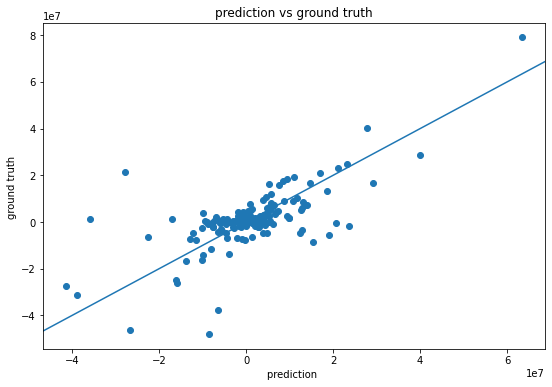

In [109]:
############## R E L E V A N T   C O D E
#Get def for R2, RMSE and add identity

def R2(test, pred):
    SS_Residual = sum((test - pred) ** 2)
    SS_Total = sum((test - np.mean(test)) ** 2)
    r2 = 1 - (float(SS_Residual)) / SS_Total
    return r2


def RMSE(test, pred):
    rmse = np.sqrt(sum((pred - test)**2)/len(test))
    return rmse


# Calculate the performance
r2score = R2(y_test, y_pred)
rmse = RMSE(y_test, y_pred)


def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

fig, ax = plt.subplots(figsize=(9, 6))
fig = plt.scatter(x=y_pred,y=y_test)
ax.set_xlabel("prediction ")
ax.set_ylabel("ground truth ")
ax.set_title("prediction vs ground truth")

add_identity(ax)

plt.savefig("./Project_Lasso_FiErg.png")

In [110]:
############## R E L E V A N T   C O D E
print(r2score)
print(rmse)

0.41406213021684557
9331472.123019611


In [111]:
############## Unused code
# Create an instance of Lasso Regression implementation
#
lasso_cv = LassoCV(cv=5)
#
# Fit the Lasso model
#
lasso_cv.fit(X, y)
#
# Create the model score
#
lasso_cv.score(X, y)


0.3572097418367699

In [112]:
############## Unused code
 
# Define parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
 
# Perform grid search with cross-validation
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train, y_train)
 
# Print best parameter values and score
print("Best Parameters:", lasso_cv.best_params_)
print("Best Score:", lasso_cv.best_score_)

Best Parameters: {'alpha': 10}
Best Score: -0.41971811068186077


In [113]:
############## Unused code
print(np.where(lasso.coef_ == 0)[0])

#drop low correlation
X2 = X.drop(X.columns[[69, 70, 117, 118, 119, 123, 124, 127]], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
print('Training set size: {}, test set size: {}'.format(len(X_train), len(X_test)))

# Scale the data using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
 
# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
 
# Evaluate model performance on test set
y_pred = lasso.predict(X_test)
 
# Model Score
print("Model Score: ", lasso.score(X_test, y_test))
 
# Lasso Coefficient
lasso.coef_


[ 69  70  91  92  93  97  98 127]
Training set size: 673, test set size: 169
Model Score:  0.41047155308600025


array([-1.79277787e+06, -7.03905688e+05, -1.99713561e+06, -2.44541024e+06,
        1.82957873e+06,  5.39226527e+05, -1.86220805e+06, -2.75780650e+06,
        3.31962584e+06,  4.33627996e+05,  1.39031583e+05, -8.88606132e+04,
       -1.63018080e+06, -1.29676328e+07,  5.30495824e+07,  1.74287756e+07,
       -4.21738188e+07, -4.91085660e+05,  6.10614196e+06, -1.25210608e+07,
       -5.22036190e+06, -3.73605418e+06, -6.68707162e+07,  5.73805568e+07,
        5.81020567e+06, -6.09669013e+06,  2.44890056e+07, -1.56074676e+07,
       -8.74398580e+05, -1.36244209e+06,  1.64416728e+05,  1.96321082e+06,
       -3.66702549e+06,  1.40518563e+07, -2.95953393e+07, -6.17847299e+06,
       -1.72751892e+06,  1.71661794e+06,  4.74730046e+06,  8.68856442e+06,
       -6.75672630e+04, -4.91952140e+06,  4.39932731e+05, -4.78555428e+06,
        9.89697692e+06, -1.94405291e+07,  1.41534078e+05,  3.05195900e+06,
       -1.45238387e+06,  4.95706640e+06,  2.59743881e+06, -1.93934677e+06,
        3.28263750e+06, -

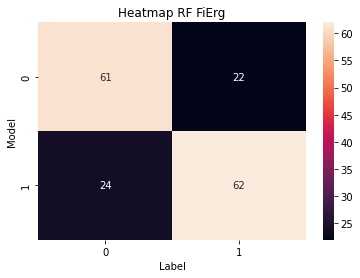

In [114]:
############## R E L E V A N T   C O D E

#set df and split label/features
df = data_encoded
X  = df.copy().drop('FiErg', axis = 1)
y  = df['FiErg']

#drop unique strings
X = X.drop(X.iloc[:,0:4], axis=1)

#print(X)

# Define the threshold
threshold = np.median(y)

# Create a new binary target variable
y_binary = np.where(y < threshold, 0, 1)

#y_binary = np.where(y < 0, 0, 1)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the model to the data
rf.fit(X_train, y_train)

# Make predictions on new data
y_pred = rf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
fig = sns.heatmap(cm, annot=True, fmt='d')
fig.set_title("Heatmap RF FiErg")
fig.set_xlabel("Label")
fig.set_ylabel("Model")

plt.savefig("./Project_Heatmap_RF_FiErg.png")

In [115]:
############## R E L E V A N T   C O D E
def evaluation_metrics(clf, y, X, ax,legend_entry='my legendEntry'):
    """
    compute multiple evaluation metrics for the provided classifier given the true labels
    and input features. Provides a plot of the roc curve on the given axis with the legend
    entry for this plot being specified, too.

    :param clf: true class labels
    :type clf: numpy array

    :param y: true class labels
    :type y: numpy array

    :param X: feature matrix
    :type X: numpy array

    :param ax: matplotlib axis to plot on
    :type legend_entry: matplotlib Axes

    :param legend_entry: the legend entry that should be displayed on the plot
    :type legend_entry: string

    :return: comfusion matrix comprising the
             true positives (tp),
             true negatives  (tn),
             false positives (fp),
             and false negatives (fn)
    :rtype: four integers
    """

    # Get the label predictions
    y_test_pred    = clf.predict(X)

    # Calculate the confusion matrix given the predicted and true labels with your function
    # only add the correct inputs here
    tn, fp, fn, tp = get_confusion_matrix(y, y_test_pred)

    # Ensure that you get correct values - this code will divert to
    # sklearn if your implementation fails - you can ignore the lines under
    # this comment, no input needed.
    tn_sk, fp_sk, fn_sk, tp_sk = confusion_matrix(y, y_test_pred).ravel()
    if np.sum([np.abs(tp-tp_sk) + np.abs(tn-tn_sk) + np.abs(fp-fp_sk) + np.abs(fn-fn_sk)]) >0:
        print('OWN confusion matrix failed!!! Reverting to sklearn.')
        tn = tn_sk
        tp = tp_sk
        fn = fn_sk
        fp = fp_sk
    else:
        print(':) Successfully implemented the confusion matrix!')

    # Calculate the evaluation metrics
    precision = tp / (tp + fp)
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)


    # Get the roc curve using a sklearn function
    y_test_predict_proba  = clf.predict_proba(X)
    fp_rates, tp_rates, _ = roc_curve(y, y_test_predict_proba[:,1])

    # Calculate the area under the roc curve using a sklearn function
    roc_auc = auc(fp_rates, tp_rates)

    # Plot on the provided axis - feel free to make this plot nicer if
    # you want to.
    ax.plot(fp_rates, tp_rates,label = legend_entry)


    return [accuracy,precision,recall,specificity,f1, roc_auc]


In [116]:
############## R E L E V A N T   C O D E
def get_confusion_matrix(y,y_pred):
    """
    compute the confusion matrix of a classifier yielding
    predictions y_pred for the true class labels y
    :param y: true class labels
    :type y: numpy array

    :param y_pred: predicted class labels
    :type y_pred: numpy array

    :return: comfusion matrix comprising the
             true positives (tp),
             true negatives  (tn),
             false positives (fp),
             and false negatives (fn)
    :rtype: four integers
    """

    # true/false pos/neg. - this is a block of code that's needed
    # HINT: consider using a for loop.
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y)):
        if y[i] == y_pred[i] and y[i] == 1:
            tp = tp + 1
        elif y[i] == y_pred[i] and y[i] == 0:
            tn = tn + 1
        elif y[i] == 1:
            fn = fn + 1
        elif y[i] == 0:
            fp = fp + 1
    return tn, fp, fn, tp

(842, 165)
(842,)
(169, 165)
(169,)
:) Successfully implemented the confusion matrix!
:) Successfully implemented the confusion matrix!
(169, 165)
(169,)
:) Successfully implemented the confusion matrix!
:) Successfully implemented the confusion matrix!
(168, 165)
(168,)
:) Successfully implemented the confusion matrix!
:) Successfully implemented the confusion matrix!
(168, 165)
(168,)
:) Successfully implemented the confusion matrix!
:) Successfully implemented the confusion matrix!
(168, 165)
(168,)
:) Successfully implemented the confusion matrix!
:) Successfully implemented the confusion matrix!


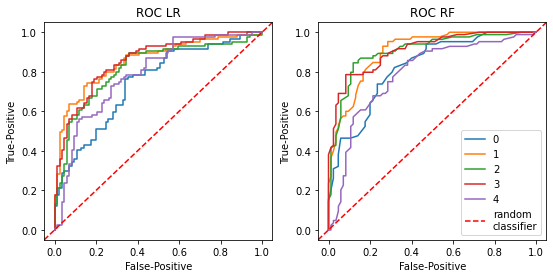

In [117]:
############## R E L E V A N T   C O D E


from sklearn.model_selection import StratifiedKFold

n_splits = 5
skf      = StratifiedKFold(n_splits= n_splits, random_state=None, shuffle=False)



df_performance = pd.DataFrame(columns = ['fold','clf','accuracy','precision','recall',
                                         'specificity','F1','roc_auc'])
df_LR_normcoef = pd.DataFrame(index = X.columns, columns = np.arange(n_splits))


fold = 0
fig,axs = plt.subplots(1,2,figsize=(9, 4))

print(X.shape)
print(y_binary.shape)

# Loop over all splits
for i, (i_train, i_test) in enumerate(skf.split(X, y_binary)):

    # Get the relevant subsets for training and testing
    X_test  = X.iloc[i_test]
    y_test  = y_binary[i_test]
    X_train = X.iloc[i_train]
    y_train = y_binary[i_train]


    # Standardize the numerical features using training set statistics
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc  = sc.transform(X_test)

    
    print(X_test.shape)
    print(y_test.shape)

    # Create prediction models and fit them to the training data

    from sklearn.linear_model import LogisticRegression

    # Logistic regression
    clf = LogisticRegression()
    clf.fit(X_train_sc, y_train)

    # Get the importance values
    df_this_LR_coefs = pd.DataFrame(zip(X_train.columns, np.transpose(clf.coef_)), columns=['features', 'coef'])
    norm = sum(abs(df_this_LR_coefs['coef']))
    df_LR_normcoef.loc[:,fold] = df_this_LR_coefs['coef'].values
    df_LR_normcoef.loc[:, fold] = abs(df_LR_normcoef.loc[:, fold])/norm

    from sklearn.ensemble import RandomForestClassifier

    # Random forest
    clf2 = RandomForestClassifier()
    ### Fit
    clf2.fit(X_train_sc, y_train)
    
    # Evaluate your classifiers 
    eval_metrics = evaluation_metrics(clf, y_test, X_test_sc, axs[0],legend_entry=str(fold))
    df_performance.loc[len(df_performance),:] = [fold,'LR']+eval_metrics

    eval_metrics_RF = evaluation_metrics(clf2, y_test, X_test_sc, axs[1],legend_entry=str(fold))
    df_performance.loc[len(df_performance), :] = [fold, 'RF'] + eval_metrics_RF

    # increase counter for folds
    fold += 1

model_names = ["ROC LR", "ROC RF"]
for i,ax in enumerate(axs):
    ax.set_xlabel("False-Positive")
    ax.set_ylabel("True-Positive")
    add_identity(ax, color="r", ls="--",label = 'random\nclassifier')

    ax.set_title(model_names[i])

    plt.legend()
    
    plt.savefig("./Project_ROC_LRandRF_FiErg.png")

RF accuracy mean: 0.7625810087348548
RF accuracy std: 0.09754407175548471
RF precision mean: 0.7534010285016997
RF precision std: 0.1185711921399683
RF recall mean: 0.8384873949579832
RF recall std: 0.10565936236065136
RF specificity mean: 0.6875350140056022
RF specificity std: 0.2585439484564105
RF F1 mean: 0.7836291823364855
RF F1 std: 0.06317693576354633
RF roc_auc mean: 0.8648717820461517
RF roc_auc std: 0.05593651554209481
(165, 7)
                                        0                         1  \
AustStatMSA         [0.03432738223375637]     [0.03794999248762215]   
AustStatMST         [0.03308522730412821]     [0.03656691952271707]   
NeugStatMST        [0.032052067084914045]    [0.034451621426968775]   
Gebs               [0.029752390729377534]     [0.03469662302598454]   
KostKVGStatA        [0.02630698627424948]    [0.030894680669923017]   
AwInvest           [0.020700636327551567]     [0.02357031602550396]   
EtMedL             [0.023916511014652073]    [0.02476507112216

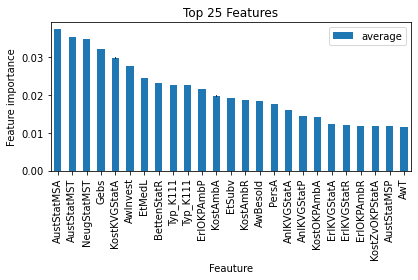

In [118]:
############## R E L E V A N T   C O D E
for col in ['accuracy', 'precision', 'recall', 'specificity', 'F1','roc_auc']:
    #print('LR', col, 'mean:', df_performance.loc[::2, col].mean())
    #print('LR', col, 'std:', df_performance.loc[::2, col].std())
    print('RF', col, 'mean:', df_performance.loc[::-2, col].mean())
    print('RF', col, 'std:', df_performance.loc[::-2, col].std())

# Average the feature importance across the five folds and sort them

std_per_row = df_LR_normcoef.std(axis=1)

#print(df_LR_normcoef)
df_LR_normcoef['std'] = std_per_row
df_LR_normcoef['average'] = 0
#print(df_LR_normcoef)

print(df_LR_normcoef.shape)



for index in df_LR_normcoef:
        df_LR_normcoef['average'] = df_LR_normcoef.iloc[:, 0:5].mean(axis=1)
                
df_LR_normcoef = df_LR_normcoef.sort_values('average', ascending=False)

print(df_LR_normcoef)

# Visualize the normalized feature importance averaged across the five folds
# FOR THE TOP 25 features and add error bars to indicate the std
df_LR_normcoef_25= df_LR_normcoef.drop(index=df_LR_normcoef.index[-140:])
ax= df_LR_normcoef_25.plot(kind='bar', xerr = 'std')

ax.set_xlabel('Feauture')
ax.set_ylabel('Feature importance')
ax.set_title('Top 25 Features')
plt.tight_layout()

plt.legend()

plt.savefig("./Project_feature_importance_FiErg.png")

In [119]:
############## R E L E V A N T   C O D E
#This code is to fix the variables that were onehot-encoded with the explode method and thus evaded detection of systematic missingness, if certain entries were only done during certain years

yearsDF4=[2010 ,2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
def fill_target(df, target, years):
    for year in years:
        mask = df['JAHR'] == year
        if df.loc[mask, target].eq(0).all():
            next_year = next((y for y in years if not df.loc[df['JAHR'] == y, target].eq(0).all()), None)
            if next_year:
                for i, row in df.loc[mask].iterrows():
                    mask2 = (df['Inst'] == row['Inst']) & (df['Adr'] == row['Adr'])
                    if df.loc[mask2 & (df['JAHR'] == next_year), target].eq(1).any():
                        df.loc[i, target] = 1
    
    return df
list_of_targets1=['SL_IPS', 'SL_NF', 'SA_Angio', 'SA_CC', 'SA_CT', 'SA_Dia', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs','WB_MSt']
list_of_targets2=['SL_IPS', 'SL_NF', 'SA_Angio', 'SA_CC', 'SA_CT', 'SA_Dia', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs','WB_MSt','LA_Amb', 'LA_Stat']
list_of_targets3=['SL_IPS', 'SL_NF', 'SA_CC', 'SA_CT', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs','WB_MSt']
list_of_targets4=['SL_IPS', 'SL_NF', 'SA_Angio', 'SA_CC', 'SA_CT', 'SA_Dia', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs','WB_MSt']
DF_S=['DF', 'DF2', 'DF3', 'DF4']

yearsDF=[2014, 2015, 2016, 2017, 2018, 2019, 2020]
yearsDF2=[2016, 2017, 2018, 2019, 2020]
yearsDF3=[2010 ,2011, 2012, 2013]
yearsDF4=[2010 ,2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

for var in list_of_targets1:
    DF=fill_target(DF, var, yearsDF)
for var in list_of_targets2:
    DF2=fill_target(DF2, var, yearsDF2)
for var in list_of_targets3:
    DF3=fill_target(DF3, var,yearsDF3)
for var in list_of_targets4:
    DF4=fill_target(DF4, var, yearsDF4)
#DF4=fill_target(DF4,'SA_Angio', yearsDF4)

In [120]:
#more visualisaiton
get_missing_values_df(DF2)
# display the resulting DataFrame
get_missing_values_df(DF4)

#more visualisaiton

#years = [2010 ,2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
#for year in years:
#    df_year = DF4[DF4['JAHR'] == year]
#    count_0 = len(df_year[df_year['SA_Dia'] == 0])
#    count_1 = len(df_year[df_year['SA_Dia'] == 1])
#    print(f"In year {year}, there are {count_0} zeros and {count_1} ones in the SA_Dia column.")

,year,count,JAHR,KT,Inst,Adr,Ort,Typ,AnzStand,Ops,Gebs,CMIb,CMIn,pPatWAU,pPatWAK,pPatLKP,pPatHOK,PersA,PersP,PersMT,PersT,AwBesold,AwInvest,AwSonst,AwT,EtMedL,EtSonst,EtSubv,FiErg,BettenStatA,pBettenBelStatA,KostAmbA,KostOKPAmbA,KostStatA,KostKVGStatA,AnlKVGStatA,KostZvOKPStatA,AnlZvOKPStatA,ErlOKPAmbA,ErlKVGStatA,ErlKVGStatVA,ErlZvOKPStatA,ErlZvOKPStatVA,BettenStatP,pBettenBelStatP,KostAmbP,KostOKPAmbP,KostStatP,KostKVGStatP,AnlKVGStatP,KostZvOKPStatP,AnlZvOKPStatP,ErlOKPAmbP,ErlKVGStatP,ErlKVGStatVP,ErlZvOKPStatP,ErlZvOKPStatVP,BettenStatR,pBettenBelStatR,KostAmbR,KostOKPAmbR,KostStatR,KostKVGStatR,AnlKVGStatR,KostZvOKPStatR,AnlZvOKPStatR,ErlOKPAmbR,ErlKVGStatR,ErlKVGStatVR,ErlZvOKPStatR,ErlZvOKPStatVR,BettenStatB,pBettenBelStatB,KostAmbB,KostOKPAmbB,KostStatB,KostKVGStatB,AnlKVGStatB,KostZvOKPStatB,AnlZvOKPStatB,ErlOKPAmbB,ErlKVGStatB,ErlKVGStatVB,ErlZvOKPStatB,ErlZvOKPStatVB,Akt_A,Akt_B,Akt_P,Akt_R,SL_IPS,SL_NF,SA_Angio,SA_CC,SA_CT,SA_Dia,SA_LB,SA_Lito,SA_MRI,SA_PET,WB_Arzt,WB_BGs,WB_MSt,Typ_K111,Typ_K112,Typ_K121,Typ_K122,Typ_K123,Typ_K211,Typ_K212,Typ_K221,Typ_K231,Typ_K232,Typ_K233,Typ_K234,Typ_K235,KT_AG,KT_AI,KT_AR,KT_BE,KT_BL,KT_BS,KT_FR,KT_GE,KT_GL,KT_GR,KT_JU,KT_LU,KT_NE,KT_NW,KT_OW,KT_SG,KT_SH,KT_SO,KT_SZ,KT_TG,KT_TI,KT_UR,KT_VD,KT_VS,KT_ZG,KT_ZH
0,2010,300,300,300,300,279,300,300,300,297,298,158,158,286,285,286,286,293,293,299,293,298,299,299,299,296,299,299,299,299,176,299,299,299,299,299,299,299,299,299,137,299,129,299,71,299,299,299,299,299,299,299,299,299,60,299,34,299,82,299,299,299,299,299,299,299,299,299,69,299,48,299,13,299,299,299,299,299,299,299,299,299,3,299,4,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300
1,2011,300,300,300,300,280,300,300,300,299,299,167,167,296,296,296,296,299,299,299,299,299,299,299,299,296,299,299,299,299,177,299,299,299,299,299,299,299,299,299,141,299,140,299,70,299,299,299,299,299,299,299,299,299,63,299,34,299,83,299,299,299,299,299,299,299,299,299,75,299,57,299,13,299,299,299,299,299,299,299,299,299,5,299,4,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300
2,2012,298,298,298,298,279,298,298,298,297,297,165,165,292,292,292,292,291,291,291,291,297,297,297,297,297,297,297,297,174,171,174,174,174,174,174,174,174,174,174,154,174,147,72,71,72,72,72,72,72,72,72,72,72,65,72,35,89,86,89,89,89,89,89,89,89,89,89,76,89,59,20,16,20,20,20,20,20,20,20,20,20,12,20,5,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298
3,2013,293,293,293,293,277,293,293,293,289,287,164,164,286,286,286,286,286,286,286,286,290,291,291,291,291,291,291,291,175,170,175,175,175,175,175,175,175,175,175,156,175,150,78,74,78,78,78,78,78,78,78,78,78,72,78,42,93,83,93,93,93,93,93,93,93,93,93,76,93,61,18,14,18,18,18,18,18,18,18,18,18,11,18,4,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293
4,2014,289,289,289,289,273,289,289,289,286,285,160,160,284,284,284,284,285,285,285,285,288,288,288,288,285,288,288,288,168,167,168,168,168,168,168,168,168,168,168,158,168,153,76,74,76,76,76,76,76,76,76,76,76,72,76,41,93,87,93,93,93,93,93,93,93,93,93,86,93,72,18,14,18,18,18,18,18,18,18,18,18,13,18,4,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289
5,2015,288,288,288,288,275,288,288,2

In [121]:
############## R E L E V A N T   C O D E
#this code replaces missing values per measured metric, if there is a measurement in the same metric, but in a different category(meaning a different suffix)
list_of_fixable = ['PtageStatMS', 'AustStatMS', 'BettenStat', 'DADStatMS', 'KostAmb', 'KostOKPAmb', 'KostStat', 'KostKVGStat', 'AnlKVGStat', 'KostZvOKPStat', 'AnlZvOKPStat', 'ErlOKPAmb', 'ErlKVGStat']
list_of_bools = ['Akt_A', 'Akt_B', 'Akt_P', 'Akt_R']
list_of_fixable_A = [element + 'A' for element in list_of_fixable]
list_of_fixable_P = [element + 'P' for element in list_of_fixable]
list_of_fixable_R = [element + 'R' for element in list_of_fixable]
list_of_fixable_B = [element + 'A' for element in list_of_fixable]
matrix_with_indices = np.zeros((len(DF), len(list_of_fixable)))
for var in range(len(list_of_fixable)):
    for i in range(len(DF)):
        if DF['Akt_A'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_A[var]][i+1819]):
            matrix_with_indices[i,var] += 1
        elif DF['Akt_P'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_P[var]][i+1819]):
            matrix_with_indices[i,var] += 1
        elif DF['Akt_R'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_R[var]][i+1819]):
            matrix_with_indices[i,var] += 1
        elif DF['Akt_B'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_B[var]][i+1819]):
            matrix_with_indices[i,var] += 1
        if not ((DF['Akt_A'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_A[var]][i+1819])) or (DF['Akt_P'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_P[var]][i+1819])) or (DF['Akt_R'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_R[var]][i+1819])) or (DF['Akt_B'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_B[var]][i+1819]))):
            matrix_with_indices[i,var] -= 0
np.set_printoptions(threshold=np.inf)
#print(matrix_with_indices)
############## R E L E V A N T   C O D E


for var in range(len(list_of_fixable)):
    for i in range(len(DF)):
        if matrix_with_indices[i,var] == 1:
            if pd.isnull(DF.loc[i+1819, list_of_fixable_A[var]]):
                DF.loc[i+1819, list_of_fixable_A[var]] = 0
            if pd.isnull(DF.loc[i+1819, list_of_fixable_P[var]]):
                DF.loc[i+1819, list_of_fixable_P[var]] = 0
            if pd.isnull(DF.loc[i+1819, list_of_fixable_R[var]]):
                DF.loc[i+1819, list_of_fixable_R[var]] = 0
            if pd.isnull(DF.loc[i+1819, list_of_fixable_B[var]]):
                DF.loc[i+1819, list_of_fixable_B[var]] = 0

In [122]:
#do same fixing for DF2 with AmbKons added to list
list_of_fixable2 = ['AmbKons','PtageStatMS', 'AustStatMS', 'BettenStat', 'DADStatMS', 'KostAmb', 'KostOKPAmb', 'KostStat', 'KostKVGStat', 'AnlKVGStat', 'KostZvOKPStat', 'AnlZvOKPStat', 'ErlOKPAmb', 'ErlKVGStat']
list_of_bools2 = ['Akt_A', 'Akt_B', 'Akt_P', 'Akt_R']
list_of_fixable_A2 = [element + 'A' for element in list_of_fixable2]
list_of_fixable_P2 = [element + 'P' for element in list_of_fixable2]
list_of_fixable_R2 = [element + 'R' for element in list_of_fixable2]
list_of_fixable_B2 = [element + 'B' for element in list_of_fixable2]
matrix_with_indices2 = np.zeros((len(DF2), len(list_of_fixable2)))
for var in range(len(list_of_fixable2)):
    for i in range(len(DF2)):
        if DF2['Akt_A'][i+2396] == 1 and pd.notnull(DF2[list_of_fixable_A2[var]][i+2396]):
            matrix_with_indices2[i,var] += 1
        elif DF2['Akt_P'][i+2396] == 1 and pd.notnull(DF2[list_of_fixable_P2[var]][i+2396]):
            matrix_with_indices2[i,var] += 1
        elif DF2['Akt_R'][i+2396] == 1 and pd.notnull(DF2[list_of_fixable_R2[var]][i+2396]):
            matrix_with_indices2[i,var] += 1
        elif DF2['Akt_B'][i+2396] == 1 and pd.notnull(DF2[list_of_fixable_B2[var]][i+2396]):
            matrix_with_indices2[i,var] += 1
        if not ((DF2['Akt_A'][i+2396] == 1 and pd.notnull(DF2[list_of_fixable_A2[var]][i+2396])) or (DF2['Akt_P'][i+2396] == 1 and pd.notnull(DF2[list_of_fixable_P2[var]][i+2396])) or (DF2['Akt_R'][i+2396] == 1 and pd.notnull(DF2[list_of_fixable_R2[var]][i+2396])) or (DF2['Akt_B'][i+2396] == 1 and pd.notnull(DF2[list_of_fixable_B2[var]][i+2396]))):
            matrix_with_indices2[i,var] -= 0
np.set_printoptions(threshold=np.inf)
#print(matrix_with_indices)
############## R E L E V A N T   C O D E


for var in range(len(list_of_fixable2)):
    for i in range(len(DF2)):
        if matrix_with_indices2[i,var] == 1:
            if pd.isnull(DF2.loc[i+2396, list_of_fixable_A2[var]]):
                DF2.loc[i+2396, list_of_fixable_A2[var]] = 0
            if pd.isnull(DF2.loc[i+2396, list_of_fixable_P2[var]]):
                DF2.loc[i+2396, list_of_fixable_P2[var]] = 0
            if pd.isnull(DF2.loc[i+2396, list_of_fixable_R2[var]]):
                DF2.loc[i+2396, list_of_fixable_R2[var]] = 0
            if pd.isnull(DF2.loc[i+2396, list_of_fixable_B2[var]]):
                DF2.loc[i+2396, list_of_fixable_B2[var]] = 0

In [123]:
#same action for DF3

list_of_fixable3 = ['PtageStat', 'AustStat', 'BettenStat', 'DADStat', 'KostAmb', 'KostOKPAmb', 'KostStat', 'KostKVGStat', 'AnlKVGStat', 'KostZvOKPStat', 'AnlZvOKPStat', 'KostLang', 'AuftragLF', 'ErlAmb', 'ErlOKPAmb', 'ErlStat', 'ErlKVGStat', 'ErlZvOKPStat', 'ErlLang']
list_of_bools3 = ['Akt_A', 'Akt_B', 'Akt_P', 'Akt_R']
list_of_fixable_A3 = [element + 'A' for element in list_of_fixable3]
list_of_fixable_P3 = [element + 'P' for element in list_of_fixable3]
list_of_fixable_R3 = [element + 'R' for element in list_of_fixable3]
list_of_fixable_B3 = [element + 'B' for element in list_of_fixable3]
matrix_with_indices3 = np.zeros((len(DF3), len(list_of_fixable3)))
for var in range(len(list_of_fixable3)):
    for i in range(len(DF3)):
        if DF3['Akt_A'][i+628] == 1 and pd.notnull(DF3[list_of_fixable_A3[var]][i+628]):
            matrix_with_indices3[i,var] += 1
        elif DF3['Akt_P'][i+628] == 1 and pd.notnull(DF3[list_of_fixable_P3[var]][i+628]):
            matrix_with_indices3[i,var] += 1
        elif DF3['Akt_R'][i+628] == 1 and pd.notnull(DF3[list_of_fixable_R3[var]][i+628]):
            matrix_with_indices3[i,var] += 1
        elif DF3['Akt_B'][i+628] == 1 and pd.notnull(DF3[list_of_fixable_B3[var]][i+628]):
            matrix_with_indices3[i,var] += 1
        if not ((DF3['Akt_A'][i+628] == 1 and pd.notnull(DF3[list_of_fixable_A3[var]][i+628])) or (DF3['Akt_P'][i+628] == 1 and pd.notnull(DF3[list_of_fixable_P3[var]][i+628])) or (DF3['Akt_R'][i+628] == 1 and pd.notnull(DF3[list_of_fixable_R3[var]][i+628])) or (DF3['Akt_B'][i+628] == 1 and pd.notnull(DF3[list_of_fixable_B3[var]][i+628]))):
            matrix_with_indices3[i,var] -= 0
np.set_printoptions(threshold=np.inf)

for var in range(len(list_of_fixable3)):
    for i in range(len(DF3)):
        if matrix_with_indices3[i,var] == 1:
            if pd.isnull(DF3.loc[i+628, list_of_fixable_A3[var]]):
                DF3.loc[i+628, list_of_fixable_A3[var]] = 0
            if pd.isnull(DF3.loc[i+628, list_of_fixable_P3[var]]):
                DF3.loc[i+628, list_of_fixable_P3[var]] = 0
            if pd.isnull(DF3.loc[i+628, list_of_fixable_R3[var]]):
                DF3.loc[i+628, list_of_fixable_R3[var]] = 0
            if pd.isnull(DF3.loc[i+628, list_of_fixable_B3[var]]):
                DF3.loc[i+628, list_of_fixable_B3[var]] = 0


In [124]:
#same action for DF4

list_of_fixable4 = ['BettenStat', 'KostAmb', 'KostOKPAmb', 'KostStat', 'KostKVGStat', 'AnlKVGStat', 'KostZvOKPStat', 'AnlZvOKPStat', 'ErlOKPAmb', 'ErlKVGStat', 'ErlZvOKPStat']
list_of_bools4 = ['Akt_A', 'Akt_B', 'Akt_P', 'Akt_R']
list_of_fixable_A4 = [element + 'A' for element in list_of_fixable4]
list_of_fixable_P4 = [element + 'P' for element in list_of_fixable4]
list_of_fixable_R4 = [element + 'R' for element in list_of_fixable4]
list_of_fixable_B4 = [element + 'B' for element in list_of_fixable4]
matrix_with_indices4 = np.zeros((len(DF4), len(list_of_fixable4)))
for var in range(len(list_of_fixable4)):
    for i in range(len(DF4)):
        if DF4['Akt_A'][i+628] == 1 and pd.notnull(DF4[list_of_fixable_A4[var]][i+628]):
            matrix_with_indices4[i,var] += 1
        elif DF4['Akt_P'][i+628] == 1 and pd.notnull(DF4[list_of_fixable_P4[var]][i+628]):
            matrix_with_indices4[i,var] += 1
        elif DF4['Akt_R'][i+628] == 1 and pd.notnull(DF4[list_of_fixable_R4[var]][i+628]):
            matrix_with_indices4[i,var] += 1
        elif DF4['Akt_B'][i+628] == 1 and pd.notnull(DF4[list_of_fixable_B4[var]][i+628]):
            matrix_with_indices4[i,var] += 1
        if not ((DF4['Akt_A'][i+628] == 1 and pd.notnull(DF4[list_of_fixable_A4[var]][i+628])) or (DF4['Akt_P'][i+628] == 1 and pd.notnull(DF4[list_of_fixable_P4[var]][i+628])) or (DF4['Akt_R'][i+628] == 1 and pd.notnull(DF4[list_of_fixable_R4[var]][i+628])) or (DF4['Akt_B'][i+628] == 1 and pd.notnull(DF4[list_of_fixable_B4[var]][i+628]))):
            matrix_with_indices4[i,var] -= 0
np.set_printoptions(threshold=np.inf)

for var in range(len(list_of_fixable4)):
    for i in range(len(DF4)):
        if matrix_with_indices4[i,var] == 1:
            if pd.isnull(DF4.loc[i+628, list_of_fixable_A4[var]]):
                DF4.loc[i+628, list_of_fixable_A4[var]] = 0
            if pd.isnull(DF4.loc[i+628, list_of_fixable_P4[var]]):
                DF4.loc[i+628, list_of_fixable_P4[var]] = 0
            if pd.isnull(DF4.loc[i+628, list_of_fixable_R4[var]]):
                DF4.loc[i+628, list_of_fixable_R4[var]] = 0
            if pd.isnull(DF4.loc[i+628, list_of_fixable_B4[var]]):
                DF4.loc[i+628, list_of_fixable_B4[var]] = 0


In [125]:
#getting the correlations between all the stuff
cor_matrix=DF.corr()
cor_matrix2=DF2.corr()
cor_matrix3=DF3.corr()
cor_matrix4=DF4.corr()
print(cor_matrix2[['AwT','EtMedL','EtSonst','FiErg']])

                      AwT    EtMedL       EtSonst     FiErg
JAHR             0.019293  0.013891  4.591518e-02 -0.119990
AnzStand         0.202961  0.210476  1.705161e-01 -0.012772
AmbKonsT         0.950419  0.915201  8.848583e-01  0.052949
PtageStatMST     0.927867  0.878545  8.046253e-01  0.072412
AustStatMST      0.939143  0.958192  8.645889e-01  0.073366
NeugStatMST      0.798822  0.807383  7.539598e-01  0.048816
Ops              0.896674  0.923997  8.335171e-01  0.074132
Gebs             0.696810  0.726108  6.629180e-01  0.012728
CMIb             0.419542  0.447235  3.901154e-01  0.104640
CMIn             0.437820  0.460072  4.059283e-01  0.097093
pPatWAU         -0.044424 -0.061957 -3.816102e-02 -0.008490
pPatWAK         -0.167562 -0.175941 -1.252693e-01 -0.010664
pPatLKP         -0.081483 -0.079579 -6.482458e-02  0.061766
pPatHOK          0.017597  0.026261  2.691940e-02  0.007175
PersA            0.986333  0.954345  9.017481e-01  0.071516
PersP            0.987724  0.955493  8.7

In [126]:
#for 1st DF
#I ALSO REMOVED JAHR, ADR+ ORT IN THIS STEP BY REMOVING IT FROM ALL LISTS, further only select non financial data to prevent data leakage
list_non_financial_AwT=['KT', 'Inst', 'Typ', 'AnzStand', 'RForm', 'PtageStatMST', 'AustStatMST', 'NeugStatMST', 'Ops', 'Gebs', 'CMIb', 'CMIn', 'pPatWAU', 'pPatWAK', 'pPatLKP', 'pPatHOK', 'PersA', 'PersP', 'PersMT', 'PersT', 'StdBelA', 'StdBelP', 'AwT', 'PtageStatMSA', 'AustStatMSA', 'BettenStatA', 'DADStatMSA', 'pBettenBelStatA', 'PtageStatMSP', 'AustStatMSP', 'BettenStatP', 'DADStatMSP', 'pBettenBelStatP', 'PtageStatMSR', 'AustStatMSR', 'BettenStatR', 'DADStatMSR', 'pBettenBelStatR', 'PtageStatMSB', 'AustStatMSB', 'BettenStatB', 'DADStatMSB', 'pBettenBelStatB', 'Akt_A', 'Akt_B', 'Akt_P', 'Akt_R', 'SL_IPS', 'SL_NF', 'SA_Angio', 'SA_CC', 'SA_CT', 'SA_Dia', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs', 'WB_MSt','Typ_K111', 'Typ_K112', 'Typ_K121', 'Typ_K122', 'Typ_K123', 'Typ_K211', 'Typ_K212', 'Typ_K221', 'Typ_K231', 'Typ_K232', 'Typ_K233', 'Typ_K234', 'Typ_K235', 'KT_AG', 'KT_AI', 'KT_AR', 'KT_BE', 'KT_BL', 'KT_BS', 'KT_FR', 'KT_GE', 'KT_GL', 'KT_GR', 'KT_JU', 'KT_LU', 'KT_NE', 'KT_NW', 'KT_OW', 'KT_SG', 'KT_SH', 'KT_SO', 'KT_SZ', 'KT_TG', 'KT_TI', 'KT_UR', 'KT_VD', 'KT_VS', 'KT_ZG','KT_ZH','RForm_R1','RForm_R2','RForm_R3','RForm_R4']
list_non_financial_EtMedL=['KT', 'Inst', 'Typ', 'AnzStand', 'RForm', 'PtageStatMST', 'AustStatMST', 'NeugStatMST', 'Ops', 'Gebs', 'CMIb', 'CMIn', 'pPatWAU', 'pPatWAK', 'pPatLKP', 'pPatHOK', 'PersA', 'PersP', 'PersMT', 'PersT', 'StdBelA', 'StdBelP', 'EtMedL', 'PtageStatMSA', 'AustStatMSA', 'BettenStatA', 'DADStatMSA', 'pBettenBelStatA', 'PtageStatMSP', 'AustStatMSP', 'BettenStatP', 'DADStatMSP', 'pBettenBelStatP', 'PtageStatMSR', 'AustStatMSR', 'BettenStatR', 'DADStatMSR', 'pBettenBelStatR', 'PtageStatMSB', 'AustStatMSB', 'BettenStatB', 'DADStatMSB', 'pBettenBelStatB', 'Akt_A', 'Akt_B', 'Akt_P', 'Akt_R', 'SL_IPS', 'SL_NF', 'SA_Angio', 'SA_CC', 'SA_CT', 'SA_Dia', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs', 'WB_MSt','Typ_K111', 'Typ_K112', 'Typ_K121', 'Typ_K122', 'Typ_K123', 'Typ_K211', 'Typ_K212', 'Typ_K221', 'Typ_K231', 'Typ_K232', 'Typ_K233', 'Typ_K234', 'Typ_K235', 'KT_AG', 'KT_AI', 'KT_AR', 'KT_BE', 'KT_BL', 'KT_BS', 'KT_FR', 'KT_GE', 'KT_GL', 'KT_GR', 'KT_JU', 'KT_LU', 'KT_NE', 'KT_NW', 'KT_OW', 'KT_SG', 'KT_SH', 'KT_SO', 'KT_SZ', 'KT_TG', 'KT_TI', 'KT_UR', 'KT_VD', 'KT_VS', 'KT_ZG','KT_ZH','RForm_R1','RForm_R2','RForm_R3','RForm_R4']
list_non_financial_EtSonst=['KT', 'Inst', 'Typ', 'AnzStand', 'RForm', 'PtageStatMST', 'AustStatMST', 'NeugStatMST', 'Ops', 'Gebs', 'CMIb', 'CMIn', 'pPatWAU', 'pPatWAK', 'pPatLKP', 'pPatHOK', 'PersA', 'PersP', 'PersMT', 'PersT', 'StdBelA', 'StdBelP', 'EtSonst', 'PtageStatMSA', 'AustStatMSA', 'BettenStatA', 'DADStatMSA', 'pBettenBelStatA', 'PtageStatMSP', 'AustStatMSP', 'BettenStatP', 'DADStatMSP', 'pBettenBelStatP', 'PtageStatMSR', 'AustStatMSR', 'BettenStatR', 'DADStatMSR', 'pBettenBelStatR', 'PtageStatMSB', 'AustStatMSB', 'BettenStatB', 'DADStatMSB', 'pBettenBelStatB', 'Akt_A', 'Akt_B', 'Akt_P', 'Akt_R', 'SL_IPS', 'SL_NF', 'SA_Angio', 'SA_CC', 'SA_CT', 'SA_Dia', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs', 'WB_MSt','Typ_K111', 'Typ_K112', 'Typ_K121', 'Typ_K122', 'Typ_K123', 'Typ_K211', 'Typ_K212', 'Typ_K221', 'Typ_K231', 'Typ_K232', 'Typ_K233', 'Typ_K234', 'Typ_K235', 'KT_AG', 'KT_AI', 'KT_AR', 'KT_BE', 'KT_BL', 'KT_BS', 'KT_FR', 'KT_GE', 'KT_GL', 'KT_GR', 'KT_JU', 'KT_LU', 'KT_NE', 'KT_NW', 'KT_OW', 'KT_SG', 'KT_SH', 'KT_SO', 'KT_SZ', 'KT_TG', 'KT_TI', 'KT_UR', 'KT_VD', 'KT_VS', 'KT_ZG','KT_ZH','RForm_R1','RForm_R2','RForm_R3','RForm_R4']
DF_non_financial_AwT=DF[list_non_financial_AwT]
DF_non_financial_EtMedL=DF[list_non_financial_EtMedL]
DF_non_financial_EtSonst=DF[list_non_financial_EtSonst]
#for DF2
list_non_financial_DF2_AwT=['KT', 'Inst', 'Typ', 'AnzStand', 'RForm', 'PtageStatMST', 'AustStatMST', 'NeugStatMST', 'Ops', 'Gebs', 'CMIb', 'CMIn', 'pPatWAU', 'pPatWAK', 'pPatLKP', 'pPatHOK', 'PersA', 'PersP', 'PersMT', 'PersT', 'StdBelA', 'StdBelP', 'AwT', 'PtageStatMSA', 'AustStatMSA', 'BettenStatA', 'DADStatMSA', 'pBettenBelStatA', 'PtageStatMSP', 'AustStatMSP', 'BettenStatP', 'DADStatMSP', 'pBettenBelStatP', 'PtageStatMSR', 'AustStatMSR', 'BettenStatR', 'DADStatMSR', 'pBettenBelStatR', 'PtageStatMSB', 'AustStatMSB', 'BettenStatB', 'DADStatMSB', 'pBettenBelStatB', 'Akt_A', 'Akt_B', 'Akt_P', 'Akt_R', 'SL_IPS', 'SL_NF', 'SA_Angio', 'SA_CC', 'SA_CT', 'SA_Dia', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs', 'WB_MSt','AmbKonsT', 'pMRI_AMB', 'pMRI_STAT', 'pCT_AMB', 'pCT_STAT', 'pANGIO_AMB', 'pANGIO_STAT', 'pDIA_AMB', 'pDIA_STAT', 'AmbKonsA', 'AmbKonsP', 'AmbKonsR', 'AmbKonsB', 'LA_Amb', 'LA_Stat','Typ_K111', 'Typ_K112', 'Typ_K121', 'Typ_K122', 'Typ_K123', 'Typ_K211', 'Typ_K212', 'Typ_K221', 'Typ_K231', 'Typ_K232', 'Typ_K233', 'Typ_K234', 'Typ_K235', 'KT_AG', 'KT_AI', 'KT_AR', 'KT_BE', 'KT_BL', 'KT_BS', 'KT_FR', 'KT_GE', 'KT_GL', 'KT_GR', 'KT_JU', 'KT_LU', 'KT_NE', 'KT_NW', 'KT_OW', 'KT_SG', 'KT_SH', 'KT_SO', 'KT_SZ', 'KT_TG', 'KT_TI', 'KT_UR', 'KT_VD', 'KT_VS', 'KT_ZG', 'KT_ZH','RForm_R1','RForm_R2','RForm_R3','RForm_R4']
list_non_financial_DF2_EtMedL=['KT', 'Inst', 'Typ', 'AnzStand', 'RForm', 'PtageStatMST', 'AustStatMST', 'NeugStatMST', 'Ops', 'Gebs', 'CMIb', 'CMIn', 'pPatWAU', 'pPatWAK', 'pPatLKP', 'pPatHOK', 'PersA', 'PersP', 'PersMT', 'PersT', 'StdBelA', 'StdBelP', 'EtMedL', 'PtageStatMSA', 'AustStatMSA', 'BettenStatA', 'DADStatMSA', 'pBettenBelStatA', 'PtageStatMSP', 'AustStatMSP', 'BettenStatP', 'DADStatMSP', 'pBettenBelStatP', 'PtageStatMSR', 'AustStatMSR', 'BettenStatR', 'DADStatMSR', 'pBettenBelStatR', 'PtageStatMSB', 'AustStatMSB', 'BettenStatB', 'DADStatMSB', 'pBettenBelStatB', 'Akt_A', 'Akt_B', 'Akt_P', 'Akt_R', 'SL_IPS', 'SL_NF', 'SA_Angio', 'SA_CC', 'SA_CT', 'SA_Dia', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs', 'WB_MSt','AmbKonsT', 'pMRI_AMB', 'pMRI_STAT', 'pCT_AMB', 'pCT_STAT', 'pANGIO_AMB', 'pANGIO_STAT', 'pDIA_AMB', 'pDIA_STAT', 'AmbKonsA', 'AmbKonsP', 'AmbKonsR', 'AmbKonsB', 'LA_Amb', 'LA_Stat','Typ_K111', 'Typ_K112', 'Typ_K121', 'Typ_K122', 'Typ_K123', 'Typ_K211', 'Typ_K212', 'Typ_K221', 'Typ_K231', 'Typ_K232', 'Typ_K233', 'Typ_K234', 'Typ_K235', 'KT_AG', 'KT_AI', 'KT_AR', 'KT_BE', 'KT_BL', 'KT_BS', 'KT_FR', 'KT_GE', 'KT_GL', 'KT_GR', 'KT_JU', 'KT_LU', 'KT_NE', 'KT_NW', 'KT_OW', 'KT_SG', 'KT_SH', 'KT_SO', 'KT_SZ', 'KT_TG', 'KT_TI', 'KT_UR', 'KT_VD', 'KT_VS', 'KT_ZG', 'KT_ZH','RForm_R1','RForm_R2','RForm_R3','RForm_R4']
list_non_financial_DF2_EtSonst=['KT', 'Inst', 'Typ', 'AnzStand', 'RForm', 'PtageStatMST', 'AustStatMST', 'NeugStatMST', 'Ops', 'Gebs', 'CMIb', 'CMIn', 'pPatWAU', 'pPatWAK', 'pPatLKP', 'pPatHOK', 'PersA', 'PersP', 'PersMT', 'PersT', 'StdBelA', 'StdBelP', 'EtSonst', 'PtageStatMSA', 'AustStatMSA', 'BettenStatA', 'DADStatMSA', 'pBettenBelStatA', 'PtageStatMSP', 'AustStatMSP', 'BettenStatP', 'DADStatMSP', 'pBettenBelStatP', 'PtageStatMSR', 'AustStatMSR', 'BettenStatR', 'DADStatMSR', 'pBettenBelStatR', 'PtageStatMSB', 'AustStatMSB', 'BettenStatB', 'DADStatMSB', 'pBettenBelStatB', 'Akt_A', 'Akt_B', 'Akt_P', 'Akt_R', 'SL_IPS', 'SL_NF', 'SA_Angio', 'SA_CC', 'SA_CT', 'SA_Dia', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs', 'WB_MSt','AmbKonsT', 'pMRI_AMB', 'pMRI_STAT', 'pCT_AMB', 'pCT_STAT', 'pANGIO_AMB', 'pANGIO_STAT', 'pDIA_AMB', 'pDIA_STAT', 'AmbKonsA', 'AmbKonsP', 'AmbKonsR', 'AmbKonsB', 'LA_Amb', 'LA_Stat','Typ_K111', 'Typ_K112', 'Typ_K121', 'Typ_K122', 'Typ_K123', 'Typ_K211', 'Typ_K212', 'Typ_K221', 'Typ_K231', 'Typ_K232', 'Typ_K233', 'Typ_K234', 'Typ_K235', 'KT_AG', 'KT_AI', 'KT_AR', 'KT_BE', 'KT_BL', 'KT_BS', 'KT_FR', 'KT_GE', 'KT_GL', 'KT_GR', 'KT_JU', 'KT_LU', 'KT_NE', 'KT_NW', 'KT_OW', 'KT_SG', 'KT_SH', 'KT_SO', 'KT_SZ', 'KT_TG', 'KT_TI', 'KT_UR', 'KT_VD', 'KT_VS', 'KT_ZG', 'KT_ZH','RForm_R1','RForm_R2','RForm_R3','RForm_R4']
DF2_non_financial_AwT=DF2[list_non_financial_DF2_AwT]
DF2_non_financial_EtMedL=DF2[list_non_financial_DF2_EtMedL]
DF2_non_financial_EtSonst=DF2[list_non_financial_DF2_EtSonst]

#for DF3:
list_non_financial_DF3_AwT=['KT', 'Inst', 'Typ', 'AnzStand', 'PtageStatT', 'AustStatT', 'NeugStatT', 'Ops', 'Gebs', 'CMIb', 'CMIn', 'pPatWAU', 'pPatWAK', 'pPatLKP', 'pPatHOK', 'PersA', 'PersP', 'PersMT', 'PersT', 'PersAFall', 'PersPFall', 'PersMTFall', 'PersTFall', 'AwT', 'PtageStatA', 'AustStatA', 'BettenStatA', 'DADStatA', 'pBettenBelStatA', 'PtageStatP', 'AustStatP', 'BettenStatP', 'DADStatP', 'pBettenBelStatP', 'PtageStatR', 'AustStatR', 'BettenStatR', 'DADStatR', 'pBettenBelStatR', 'PtageStatB', 'AustStatB', 'BettenStatB', 'DADStatB', 'pBettenBelStatB', 'Akt_A', 'Akt_B', 'Akt_P', 'Akt_R', 'SL_IPS', 'SL_NF', 'SA_CC', 'SA_CT', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs', 'WB_MSt','Typ_K111', 'Typ_K112', 'Typ_K121', 'Typ_K122', 'Typ_K123', 'Typ_K211', 'Typ_K212', 'Typ_K221', 'Typ_K231', 'Typ_K232', 'Typ_K233', 'Typ_K234', 'Typ_K235', 'KT_AG', 'KT_AI', 'KT_AR', 'KT_BE', 'KT_BL', 'KT_BS', 'KT_FR', 'KT_GE', 'KT_GL', 'KT_GR', 'KT_JU', 'KT_LU', 'KT_NE', 'KT_NW', 'KT_OW', 'KT_SG', 'KT_SH', 'KT_SO', 'KT_SZ', 'KT_TG', 'KT_TI', 'KT_UR', 'KT_VD', 'KT_VS', 'KT_ZG', 'KT_ZH']
list_non_financial_DF3_EtMedL=['KT', 'Inst', 'Typ', 'AnzStand', 'PtageStatT', 'AustStatT', 'NeugStatT', 'Ops', 'Gebs', 'CMIb', 'CMIn', 'pPatWAU', 'pPatWAK', 'pPatLKP', 'pPatHOK', 'PersA', 'PersP', 'PersMT', 'PersT', 'PersAFall', 'PersPFall', 'PersMTFall', 'PersTFall', 'EtMedL', 'PtageStatA', 'AustStatA', 'BettenStatA', 'DADStatA', 'pBettenBelStatA', 'PtageStatP', 'AustStatP', 'BettenStatP', 'DADStatP', 'pBettenBelStatP', 'PtageStatR', 'AustStatR', 'BettenStatR', 'DADStatR', 'pBettenBelStatR', 'PtageStatB', 'AustStatB', 'BettenStatB', 'DADStatB', 'pBettenBelStatB', 'Akt_A', 'Akt_B', 'Akt_P', 'Akt_R', 'SL_IPS', 'SL_NF', 'SA_CC', 'SA_CT', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs', 'WB_MSt','Typ_K111', 'Typ_K112', 'Typ_K121', 'Typ_K122', 'Typ_K123', 'Typ_K211', 'Typ_K212', 'Typ_K221', 'Typ_K231', 'Typ_K232', 'Typ_K233', 'Typ_K234', 'Typ_K235', 'KT_AG', 'KT_AI', 'KT_AR', 'KT_BE', 'KT_BL', 'KT_BS', 'KT_FR', 'KT_GE', 'KT_GL', 'KT_GR', 'KT_JU', 'KT_LU', 'KT_NE', 'KT_NW', 'KT_OW', 'KT_SG', 'KT_SH', 'KT_SO', 'KT_SZ', 'KT_TG', 'KT_TI', 'KT_UR', 'KT_VD', 'KT_VS', 'KT_ZG', 'KT_ZH']
list_non_financial_DF3_EtSonst=['KT', 'Inst', 'Typ', 'AnzStand', 'PtageStatT', 'AustStatT', 'NeugStatT', 'Ops', 'Gebs', 'CMIb', 'CMIn', 'pPatWAU', 'pPatWAK', 'pPatLKP', 'pPatHOK', 'PersA', 'PersP', 'PersMT', 'PersT', 'PersAFall', 'PersPFall', 'PersMTFall', 'PersTFall', 'EtSonst', 'PtageStatA', 'AustStatA', 'BettenStatA', 'DADStatA', 'pBettenBelStatA', 'PtageStatP', 'AustStatP', 'BettenStatP', 'DADStatP', 'pBettenBelStatP', 'PtageStatR', 'AustStatR', 'BettenStatR', 'DADStatR', 'pBettenBelStatR', 'PtageStatB', 'AustStatB', 'BettenStatB', 'DADStatB', 'pBettenBelStatB', 'Akt_A', 'Akt_B', 'Akt_P', 'Akt_R', 'SL_IPS', 'SL_NF', 'SA_CC', 'SA_CT', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs', 'WB_MSt','Typ_K111', 'Typ_K112', 'Typ_K121', 'Typ_K122', 'Typ_K123', 'Typ_K211', 'Typ_K212', 'Typ_K221', 'Typ_K231', 'Typ_K232', 'Typ_K233', 'Typ_K234', 'Typ_K235', 'KT_AG', 'KT_AI', 'KT_AR', 'KT_BE', 'KT_BL', 'KT_BS', 'KT_FR', 'KT_GE', 'KT_GL', 'KT_GR', 'KT_JU', 'KT_LU', 'KT_NE', 'KT_NW', 'KT_OW', 'KT_SG', 'KT_SH', 'KT_SO', 'KT_SZ', 'KT_TG', 'KT_TI', 'KT_UR', 'KT_VD', 'KT_VS', 'KT_ZG', 'KT_ZH']
DF3_non_financial_AwT=DF3[list_non_financial_DF3_AwT]
DF3_non_financial_EtMedL=DF3[list_non_financial_DF3_EtMedL]
DF3_non_financial_EtSonst=DF3[list_non_financial_DF3_EtSonst]
#for DF4:
list_non_financial_DF4_AwT=['KT', 'Inst', 'Typ', 'AnzStand', 'Ops', 'Gebs', 'CMIb', 'CMIn', 'pPatWAU', 'pPatWAK', 'pPatLKP', 'pPatHOK', 'PersA', 'PersP', 'PersMT', 'PersT', 'AwT', 'BettenStatA', 'pBettenBelStatA', 'BettenStatP', 'pBettenBelStatP', 'BettenStatR', 'pBettenBelStatR', 'BettenStatB', 'pBettenBelStatB', 'Akt_A', 'Akt_B', 'Akt_P', 'Akt_R', 'SL_IPS', 'SL_NF', 'SA_CC', 'SA_CT', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs', 'WB_MSt','SA_Angio','Typ_K111', 'Typ_K112', 'Typ_K121', 'Typ_K122', 'Typ_K123', 'Typ_K211', 'Typ_K212', 'Typ_K221', 'Typ_K231', 'Typ_K232', 'Typ_K233', 'Typ_K234', 'Typ_K235', 'KT_AG', 'KT_AI', 'KT_AR', 'KT_BE', 'KT_BL', 'KT_BS', 'KT_FR', 'KT_GE', 'KT_GL', 'KT_GR', 'KT_JU', 'KT_LU', 'KT_NE', 'KT_NW', 'KT_OW', 'KT_SG', 'KT_SH', 'KT_SO', 'KT_SZ', 'KT_TG', 'KT_TI', 'KT_UR', 'KT_VD', 'KT_VS', 'KT_ZG', 'KT_ZH']
list_non_financial_DF4_EtMedL=['KT', 'Inst', 'Typ', 'AnzStand', 'Ops', 'Gebs', 'CMIb', 'CMIn', 'pPatWAU', 'pPatWAK', 'pPatLKP', 'pPatHOK', 'PersA', 'PersP', 'PersMT', 'PersT', 'EtMedL', 'BettenStatA', 'pBettenBelStatA', 'BettenStatP', 'pBettenBelStatP', 'BettenStatR', 'pBettenBelStatR', 'BettenStatB', 'pBettenBelStatB', 'Akt_A', 'Akt_B', 'Akt_P', 'Akt_R', 'SL_IPS', 'SL_NF', 'SA_CC', 'SA_CT', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs', 'WB_MSt','SA_Angio','Typ_K111', 'Typ_K112', 'Typ_K121', 'Typ_K122', 'Typ_K123', 'Typ_K211', 'Typ_K212', 'Typ_K221', 'Typ_K231', 'Typ_K232', 'Typ_K233', 'Typ_K234', 'Typ_K235', 'KT_AG', 'KT_AI', 'KT_AR', 'KT_BE', 'KT_BL', 'KT_BS', 'KT_FR', 'KT_GE', 'KT_GL', 'KT_GR', 'KT_JU', 'KT_LU', 'KT_NE', 'KT_NW', 'KT_OW', 'KT_SG', 'KT_SH', 'KT_SO', 'KT_SZ', 'KT_TG', 'KT_TI', 'KT_UR', 'KT_VD', 'KT_VS', 'KT_ZG', 'KT_ZH']
list_non_financial_DF4_EtSonst=['KT', 'Inst', 'Typ', 'AnzStand', 'Ops', 'Gebs', 'CMIb', 'CMIn', 'pPatWAU', 'pPatWAK', 'pPatLKP', 'pPatHOK', 'PersA', 'PersP', 'PersMT', 'PersT', 'EtSonst', 'BettenStatA', 'pBettenBelStatA', 'BettenStatP', 'pBettenBelStatP', 'BettenStatR', 'pBettenBelStatR', 'BettenStatB', 'pBettenBelStatB', 'Akt_A', 'Akt_B', 'Akt_P', 'Akt_R', 'SL_IPS', 'SL_NF', 'SA_CC', 'SA_CT', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs', 'WB_MSt','SA_Angio','Typ_K111', 'Typ_K112', 'Typ_K121', 'Typ_K122', 'Typ_K123', 'Typ_K211', 'Typ_K212', 'Typ_K221', 'Typ_K231', 'Typ_K232', 'Typ_K233', 'Typ_K234', 'Typ_K235', 'KT_AG', 'KT_AI', 'KT_AR', 'KT_BE', 'KT_BL', 'KT_BS', 'KT_FR', 'KT_GE', 'KT_GL', 'KT_GR', 'KT_JU', 'KT_LU', 'KT_NE', 'KT_NW', 'KT_OW', 'KT_SG', 'KT_SH', 'KT_SO', 'KT_SZ', 'KT_TG', 'KT_TI', 'KT_UR', 'KT_VD', 'KT_VS', 'KT_ZG', 'KT_ZH']
DF4_non_financial_AwT=DF4[list_non_financial_DF4_AwT]
DF4_non_financial_EtMedL=DF4[list_non_financial_DF4_EtMedL]
DF4_non_financial_EtSonst=DF4[list_non_financial_DF4_EtSonst]

In [127]:
#define functions for the drop with the most missing and based on correlation

RowsDF=[]
def drop_most_missing(df, rows):
    complete_dfs = []
    dropped_columns=[]
    for i in range(len(df.columns)):
        col_with_most_missing = df.isnull().sum().idxmax()
        print(1-(df[col_with_most_missing].isnull().sum()/len(df)))
        df = df.drop(col_with_most_missing, axis=1)
        print(f"Dropped column: {col_with_most_missing}")
        dropped_columns.append(col_with_most_missing)
        print(f"New shape: {df.shape}")
        complete_rows = df.dropna()
        print(f"Shape with complete rows only: {complete_rows.shape}")
        if i in rows:
            complete_dfs.append(complete_rows)
        print(i)
    return complete_dfs, dropped_columns

def drop_poorly_correlated(df, target, cor_matrix):
    new_df = df.copy()
    for i in new_df.columns:
        if i in cor_matrix.index:
            correlation = cor_matrix[target][i]
            if abs(correlation) < 0.5:
                new_df.drop(i, axis=1, inplace=True)
                print(i, correlation)
    print(new_df.shape)
    return new_df


In [128]:
#for DF do the drop it is important that the correlation drop is done first to ensure that there are the maximal amount of relevant variables possible
DF_non_financial_EtMedL=drop_poorly_correlated(DF_non_financial_EtMedL,'EtMedL',cor_matrix)
DF_non_financial_EtSonst=drop_poorly_correlated(DF_non_financial_EtSonst,'EtSonst',cor_matrix)
DF_non_financial_AwT=drop_poorly_correlated(DF_non_financial_AwT,'AwT',cor_matrix)
#ForDF2
DF2_non_financial_EtMedL=drop_poorly_correlated(DF2_non_financial_EtMedL,'EtMedL',cor_matrix2)
DF2_non_financial_EtSonst=drop_poorly_correlated(DF2_non_financial_EtSonst,'EtSonst',cor_matrix2)
DF2_non_financial_AwT=drop_poorly_correlated(DF2_non_financial_AwT,'AwT',cor_matrix2)
#for DF3
DF3_non_financial_EtMedL=drop_poorly_correlated(DF3_non_financial_EtMedL,'EtMedL',cor_matrix3)
DF3_non_financial_EtSonst=drop_poorly_correlated(DF3_non_financial_EtSonst,'EtSonst',cor_matrix3)
DF3_non_financial_AwT=drop_poorly_correlated(DF3_non_financial_AwT,'AwT',cor_matrix3)
#for DF4:
DF4_non_financial_EtMedL=drop_poorly_correlated(DF4_non_financial_EtMedL,'EtMedL',cor_matrix4)
DF4_non_financial_EtSonst=drop_poorly_correlated(DF4_non_financial_EtSonst,'EtSonst',cor_matrix4)
DF4_non_financial_AwT=drop_poorly_correlated(DF4_non_financial_AwT,'AwT',cor_matrix4)

AnzStand 0.19626862523331745
CMIb 0.4478294385920264
CMIn 0.46094899496310543
pPatWAU -0.03363629949946462
pPatWAK -0.08221350790721467
pPatLKP -0.03975093651418386
pPatHOK -0.022252713412512663
StdBelA 0.17485034981083214
StdBelP 0.314427963610644
DADStatMSA 0.08329300217801547
pBettenBelStatA 0.2681754545104151
PtageStatMSP 0.15750701204487855
AustStatMSP 0.19486114153182696
BettenStatP 0.15070834929845361
DADStatMSP 0.054373832848474836
pBettenBelStatP -0.09620162464747536
PtageStatMSR 0.2677431028370091
AustStatMSR 0.25747673296295304
BettenStatR 0.22769652647492503
DADStatMSR 0.09059526981885417
pBettenBelStatR 0.07766722840919156
Akt_A 0.30100079361547055
Akt_B -0.12267345097753425
Akt_P 0.08895720738707398
Akt_R 0.0999896998059204
SL_NF 0.41819542103572305
SA_CT 0.4965223949958335
WB_Arzt 0.30142638260117427
WB_BGs 0.1405726061697602
WB_MSt 0.3667293220250031
Typ_K112 0.4601777464148645
Typ_K121 0.018472688224806872
Typ_K122 -0.05795473895607456
Typ_K123 -0.09999699118332775
Typ

AustStatMSR 0.35812438784225215
BettenStatR 0.3279195562659746
DADStatMSR 0.11592286900471414
pBettenBelStatR 0.07214384174912483
PtageStatMSB -0.07748931182613514
AustStatMSB -0.08137281679225365
BettenStatB -0.09126737806813334
DADStatMSB -0.1037293868907509
Akt_A 0.27679398418256224
Akt_B -0.10946880886840325
Akt_P 0.1096859159352801
Akt_R 0.11423348572417888
SL_NF 0.38878330526854826
SA_CT 0.4542765579262657
SA_MRI 0.4897578575858714
WB_Arzt 0.2805303141597945
WB_BGs 0.13045399695284782
WB_MSt 0.3505537624448365
pMRI_AMB -0.04987624792390876
pCT_AMB 0.27899601287782994
pCT_STAT 0.40337828122224634
pANGIO_AMB -0.042885711614949126
pANGIO_STAT 0.35041654205654427
pDIA_AMB -0.1345874735778051
pDIA_STAT 0.39058281407563067
AmbKonsP 0.45158250409970485
AmbKonsR 0.08771413600615476
AmbKonsB -0.07400085824288892
LA_Amb 0.10383875047343147
Typ_K112 0.3786265917212141
Typ_K121 0.012440279430035362
Typ_K122 -0.05983136070869697
Typ_K123 -0.09108452567419424
Typ_K211 -0.02016683172987998
Typ_

In [129]:
#select the rows based on the output below that we passed to the function; this was done manually because we intended to drop the lines without the correlation and not a fixed threshhold of 0.5, but we decided differently afterwards and this is just a remainder of the old methodology

RowsAwT=[4]
complete_dfs1, dropped_columns = drop_most_missing(DF_non_financial_AwT, RowsAwT)
RowsEtMedL=[4]
complete_dfs2, dropped_columns2 = drop_most_missing(DF_non_financial_EtMedL, RowsEtMedL)
RowsEtSonst=[3]
complete_dfs3, dropped_columns3 = drop_most_missing(DF_non_financial_EtSonst, RowsEtSonst)

#for DF2
RowsAwT2=[1]
complete_dfs4, dropped_columns4 = drop_most_missing(DF2_non_financial_AwT, RowsAwT2)
RowsEtMedL2=[1]
complete_dfs5, dropped_columns5 = drop_most_missing(DF2_non_financial_EtMedL, RowsEtMedL2)
RowsEtSonst2=[1]
complete_dfs6, dropped_columns6 = drop_most_missing(DF2_non_financial_EtSonst, RowsEtSonst2)

#for DF3
RowsAwT3=[0]
complete_dfs7, dropped_columns7 = drop_most_missing(DF3_non_financial_AwT, RowsAwT3)
RowsEtMedL3=[0]
complete_dfs8, dropped_columns8 = drop_most_missing(DF3_non_financial_EtMedL, RowsEtMedL3)
RowsEtSonst3=[0]
complete_dfs9, dropped_columns9 = drop_most_missing(DF3_non_financial_EtSonst, RowsEtSonst3)
complete_dfs9[0]=DF3_non_financial_EtSonst
#for DF4
RowsAwT4=[0]
complete_dfs10, dropped_columns10 = drop_most_missing(DF4_non_financial_AwT, RowsAwT4)
RowsEtMedL4=[0]
complete_dfs11, dropped_columns11 = drop_most_missing(DF4_non_financial_EtMedL, RowsEtMedL4)
RowsEtSonst4=[0]
complete_dfs12, dropped_columns12 = drop_most_missing(DF4_non_financial_EtSonst, RowsEtSonst4)
complete_dfs12[0]=DF4_non_financial_EtSonst

0.05154118241536132
Dropped column: DADStatMSB
New shape: (1979, 29)
Shape with complete rows only: (0, 29)
0
0.05204648812531587
Dropped column: PtageStatMSB
New shape: (1979, 28)
Shape with complete rows only: (0, 28)
1
0.05204648812531587
Dropped column: AustStatMSB
New shape: (1979, 27)
Shape with complete rows only: (0, 27)
2
0.05204648812531587
Dropped column: pBettenBelStatB
New shape: (1979, 26)
Shape with complete rows only: (0, 26)
3
0.05406771096513385
Dropped column: BettenStatB
New shape: (1979, 25)
Shape with complete rows only: (1848, 25)
4
0.9388580090955028
Dropped column: BettenStatA
New shape: (1979, 24)
Shape with complete rows only: (1848, 24)
5
0.9403739262253663
Dropped column: PtageStatMSA
New shape: (1979, 23)
Shape with complete rows only: (1848, 23)
6
0.9403739262253663
Dropped column: AustStatMSA
New shape: (1979, 22)
Shape with complete rows only: (1950, 22)
7
0.9903991915108641
Dropped column: PtageStatMST
New shape: (1979, 21)
Shape with complete rows onl

Shape with complete rows only: (1396, 20)
9
0.9957203994293866
Dropped column: Gebs
New shape: (1402, 19)
Shape with complete rows only: (1396, 19)
10
0.9957203994293866
Dropped column: AwT
New shape: (1402, 18)
Shape with complete rows only: (1396, 18)
11
0.9957203994293866
Dropped column: PtageStatMSA
New shape: (1402, 17)
Shape with complete rows only: (1396, 17)
12
0.9957203994293866
Dropped column: AustStatMSA
New shape: (1402, 16)
Shape with complete rows only: (1396, 16)
13
0.9957203994293866
Dropped column: BettenStatA
New shape: (1402, 15)
Shape with complete rows only: (1396, 15)
14
0.9957203994293866
Dropped column: AmbKonsT
New shape: (1402, 14)
Shape with complete rows only: (1396, 14)
15
0.9957203994293866
Dropped column: AmbKonsA
New shape: (1402, 13)
Shape with complete rows only: (1402, 13)
16
1.0
Dropped column: KT
New shape: (1402, 12)
Shape with complete rows only: (1402, 12)
17
1.0
Dropped column: Inst
New shape: (1402, 11)
Shape with complete rows only: (1402, 11)

Dropped column: NeugStatT
New shape: (1191, 13)
Shape with complete rows only: (1186, 13)
10
0.9958018471872376
Dropped column: PtageStatA
New shape: (1191, 12)
Shape with complete rows only: (1186, 12)
11
0.9958018471872376
Dropped column: AustStatA
New shape: (1191, 11)
Shape with complete rows only: (1186, 11)
12
0.9958018471872376
Dropped column: BettenStatA
New shape: (1191, 10)
Shape with complete rows only: (1191, 10)
13
1.0
Dropped column: KT
New shape: (1191, 9)
Shape with complete rows only: (1191, 9)
14
1.0
Dropped column: Inst
New shape: (1191, 8)
Shape with complete rows only: (1191, 8)
15
1.0
Dropped column: Typ
New shape: (1191, 7)
Shape with complete rows only: (1191, 7)
16
1.0
Dropped column: SL_IPS
New shape: (1191, 6)
Shape with complete rows only: (1191, 6)
17
1.0
Dropped column: SA_CC
New shape: (1191, 5)
Shape with complete rows only: (1191, 5)
18
1.0
Dropped column: SA_LB
New shape: (1191, 4)
Shape with complete rows only: (1191, 4)
19
1.0
Dropped column: SA_Lito

In [130]:
########################### relevant code

complete_dfs1[0].head(15)
#complete_dfs2[0]
#complete_dfs3[0]

#for DF2:
complete_dfs4[0].head(15)
#complete_dfs5[0]
#complete_dfs6[0]

#forDF3:
#complete_dfs7[0].head(15)
#complete_dfs8[0]
#complete_dfs9[0]

#fordf4:
#complete_dfs10[0].head(15)
#complete_dfs11[0]
#complete_dfs12[0]

,KT,Inst,Typ,RForm,PtageStatMST,AustStatMST,NeugStatMST,Ops,Gebs,PersA,PersP,PersMT,PersT,AwT,PtageStatMSA,AustStatMSA,BettenStatA,SL_IPS,SA_Angio,SA_CC,SA_Dia,SA_LB,SA_Lito,SA_PET,AmbKonsT,AmbKonsA,LA_Stat,Typ_K111
2396,AG,Kantonsspital Aarau AG,K112,R1,162972.0,27750.0,1574.0,17.0,5.0,622.04,1442.35,381.37,3453.08,619557580.0,162972.0,27750.0,464.057377,1,1,1,1,1,1,1,521787.0,521787.0,1,0
2397,AG,Kantonsspital Baden AG,K112,R1,111856.0,19520.0,1612.0,8.0,6.0,310.14,740.22,217.94,1782.86,311977033.0,111856.0,19520.0,349.147541,1,1,1,1,1,1,1,181994.0,181994.0,1,0
2398,AG,Hirslanden Klinik Aarau,K112,R1,50578.0,10879.0,737.0,7.0,2.0,12.22,349.12,96.80,621.17,144484631.0,50578.0,10879.0,150.327869,1,1,0,1,1,1,0,52412.0,52412.0,1,0
2399,AG,Gesundheitszentrum Fricktal,K121,R1,36684.0,8208.0,439.0,5.0,2.0,84.30,278.70,80.40,602.09,99108691.0,36684.0,8208.0,135.000000,0,0,0,0,0,0,0,86320.0,86320.0,1,0
2400,AG,Kreisspital für das Freiamt,K121,R2,33031.0,7828.0,563.0,4.0,2.0,88.47,255.61,76.45,555.16,97673248.0,33031.0,7828.0,111.693989,1,0,0,1,0,0,0,76275.0,76275.0,1,0
2401,AG,Spital Zofingen AG,K122,R1,26769.0,5008.0,0.0,4.0,0.0,57.42,224.39,86.77,502.14,72387916.0,26769.0,5008.0,100.000000,1,0,0,0,0,0,0,42103.0,42103.0,1,0
2402,AG,Asana Gruppe AG Spital Leuggern,K122,R1,15549.0,4143.0,703.0,2.0,3.0,17.99,94.41,9.86,176.55,33188837.0,15549.0,4143.0,43.032787,0,0,0,0,0,0,0,8450.0,8450.0,1,0
2403,AG,Asana Gruppe AG Spital Menziken,K122,R1,14589.0,3741.0,167.0,3.0,2.0,25.02,120.77,33.49,249.29,30796721.0,14589.0,3741.0,47.000000,0,0,0,0,0,0,0,10546.0,10546.0,1,0
2404,AG,Psychiatrische Dienste Aargau AG,K211,R1,130121.0,3683.0,0.0,0.0,0.0,99.51,362.71,178.25,900.47,133305905.0,0.0,0.0,0.000000,0,0,0,0,0,0,0,80199.0,0.0,1,0
2405,AG,Schützen Rheinfelden AG Klinik & Ambulatorium,K212,R1,31997.0,700.0,0.0,0.0,0.0,24.47,60.56,47.07,277.89,38977556.0,0.0,0.0,0.000000,0,0,0,0,0,0,0,20929.0,0.0,1,0


In [131]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, confusion_matrix, auc

In [132]:
############## R E L E V A N T   C O D E

# For complete_dfs7[0] increase model scor to 0.994 but decrease row count and columns 
data_encoded = pd.get_dummies(complete_dfs1[0], columns=["KT", "Typ", "RForm"])

#print(data_encoded)

#split into label and features
X = data_encoded.drop(["AwT"], axis=1)
y = data_encoded["AwT"]

#Exclude unique Strings
X = X.drop(X.iloc[:,0:1], axis=1)

#print(X)

# Split the data into training and test sets Best result with Test 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set size: {}, test set size: {}'.format(len(X_train), len(X_test)))

#print(X_train)
#print(y_train)
#print(X_test)
#print(y_test)

# Scale the data using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
 
# Fit Lasso regression model
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
 
# Evaluate model performance on test set
y_pred = lasso.predict(X_test)
 
# Model Score
print("Model Score: ", lasso.score(X_test, y_test))
 
# Lasso Coefficient
lasso.coef_


Training set size: 1478, test set size: 370
Model Score:  0.9904689870792457


array([-1.69795892e+07,  5.67903330e+07, -1.47769245e+06,  1.51828987e+07,
       -1.76453420e+06, -1.42821103e+07, -1.42290176e+07, -7.23050789e+06,
        2.20658931e+08,  1.59966149e+07, -4.20581514e+07, -7.37442200e+06,
        2.12193519e+06,  3.98166730e+06,  6.38810523e+06,  7.46913191e+05,
        5.91486584e+06, -5.78322781e+05,  2.12165144e+05,  1.91382491e+07,
       -2.28790824e+05, -1.30750341e+05, -3.11253418e+05, -4.04702550e+05,
       -3.02209761e+05,  1.21551004e+06,  6.49653168e+05,  6.62774287e+05,
       -3.63192703e+05,  2.71185509e+05, -1.14506006e+06, -1.60323065e+06,
       -1.38634684e+06,  4.29712878e+04, -3.31558979e+05,  1.30344710e+05,
       -3.12651380e+05,  2.03561354e+06, -5.45839397e+05, -5.84244802e+05,
       -1.71903918e+06, -8.72149362e+05, -1.63637094e+06,  5.62360731e+05,
        4.18469933e+04,  2.05510170e+06, -2.93555049e+05, -1.97632695e+06,
       -2.87917435e+05, -1.11036013e+06,  4.04133034e+05,  1.06990090e+06,
        6.73710741e+05, -

0.9904689870792457
24534826.23427357


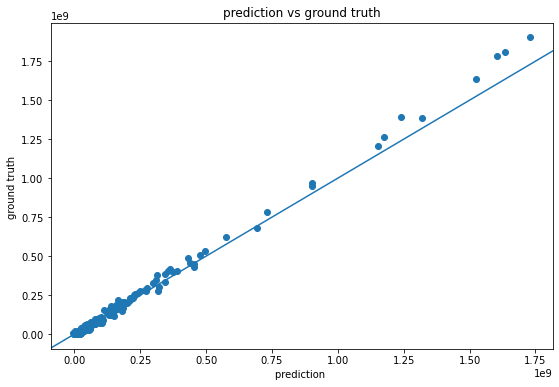

In [133]:
############## R E L E V A N T   C O D E
fig, ax = plt.subplots(figsize=(9, 6))
fig = plt.scatter(x=y_pred,y=y_test)
ax.set_xlabel("prediction ")
ax.set_ylabel("ground truth ")
ax.set_title("prediction vs ground truth")
add_identity(ax)

plt.savefig("./Project_Lasso_AwT.png")

r2score = R2(y_test, y_pred)
rmse = RMSE(y_test, y_pred)
print(r2score)
print(rmse)

In [134]:
######### unused code
# Create an instance of Lasso Regression implementation

lasso_cv = LassoCV(cv=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Lasso model
#
lasso_cv.fit(X_train, y_train)
#
# Create the model score
#
print(lasso_cv.score(X_test, y_test))
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X, y))

0.9567800709506264
0.9527112584565471
0.9536497627846943


In [135]:
######### unused code
from sklearn.model_selection import GridSearchCV
 
# Define parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
 
# Perform grid search with cross-validation
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train, y_train)
 
# Print best parameter values and score
print("Best Parameters:", lasso_cv.best_params_)
print("Best Score:", lasso_cv.best_score_)


Best Parameters: {'alpha': 10}
Best Score: 0.9953037752067415


In [136]:
print(np.where(lasso.coef_ == 0)[0])

X2 = X.drop(X.columns[np.where(lasso.coef_ == 0)[0]], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
print('Training set size: {}, test set size: {}'.format(len(X_train), len(X_test)))

#print(X_train)

# Scale the data using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
 
# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
 
# Evaluate model performance on test set
y_pred = lasso.predict(X_test)
 
# Model Score
print("Model Score: ", lasso.score(X_test, y_test))
 
# Lasso Coefficient
lasso.coef_


[]
Training set size: 1478, test set size: 370
Model Score:  0.9904690587559428


array([-1.69836904e+07,  5.68053903e+07, -1.47758424e+06,  1.51831892e+07,
       -1.76458257e+06, -1.42838125e+07, -1.42305639e+07, -7.23151114e+06,
        2.20663405e+08,  1.59992618e+07, -4.20731927e+07, -7.37429296e+06,
        2.12204757e+06,  3.98167712e+06,  6.38809993e+06,  7.46961342e+05,
        5.91490079e+06, -5.78256837e+05,  2.12182118e+05,  1.91571932e+07,
       -2.34307129e+05, -1.32290245e+05, -3.14263058e+05, -4.10946171e+05,
       -3.05625463e+05,  1.21135636e+06,  6.47351046e+05,  6.58938477e+05,
       -3.65134724e+05,  2.66291588e+05, -1.14693337e+06, -1.60671677e+06,
       -1.38905792e+06,  4.15741122e+04, -3.32786078e+05,  1.25806515e+05,
       -3.14477269e+05,  2.03346853e+06, -5.48264520e+05, -5.88248015e+05,
       -1.72346087e+06, -8.73173428e+05, -1.64205128e+06,  5.59260187e+05,
        3.92003672e+04,  2.04804306e+06, -3.13349679e+05, -1.97888750e+06,
       -2.89742214e+05, -1.11251015e+06,  4.02409492e+05,  1.06823045e+06,
        6.71568182e+05, -

Training set size: 1478, test set size: 370
Model Score:  0.9902597610470262
[ 1.09067027e+07 -3.62090049e+07 -6.28776007e+05  1.53276679e+07
 -2.06835178e+06 -2.21346351e+07 -6.16744719e+07 -2.06430152e+07
  2.87090638e+08 -2.46711565e+07  5.76373211e+07  3.07213282e+06
  2.05446935e+06  3.73772929e+06  5.66270287e+06  1.22036809e+06
  6.40547161e+06 -1.21733463e+06  1.54144932e+06  8.60822253e+06
 -3.46158230e+05 -2.92824742e+05 -3.87611866e+05 -1.01382179e+05
 -1.84711335e+05  1.17305614e+06  1.01693942e+06  5.99535478e+05
 -4.00579441e+05  2.30293800e+05 -8.62685680e+05 -1.64808646e+06
 -1.41360054e+06  9.34500337e+04 -4.46429671e+05 -2.95699242e+05
  1.16821884e+05  2.35944845e+06 -5.49126654e+05 -1.33559613e+05
 -1.57805184e+06 -7.74425683e+05 -1.31958168e+06  1.02404637e+06
  1.66893603e+05  2.23991851e+06  8.60822253e+06 -1.26953644e+06
 -1.76125530e+05 -1.27609773e+06  2.75136565e+05 -7.43689951e+05
 -1.41504502e+05  1.19187449e+05 -5.18428550e+05 -2.69445104e+04
  4.65306274e

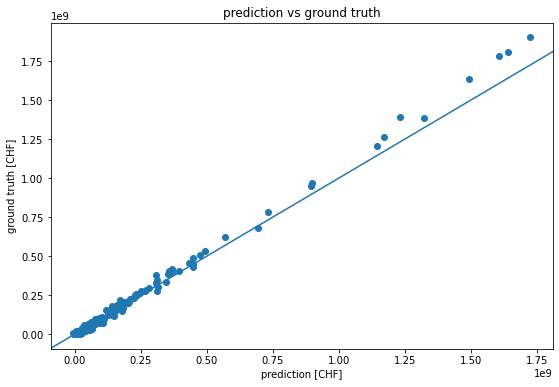

In [137]:
############## R E L E V A N T   C O D E
X = data_encoded.drop(["AwT"], axis=1)
y = data_encoded["AwT"]

#Exclude Strings
X = X.drop(X.iloc[:,0:1], axis=1)

#data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set size: {}, test set size: {}'.format(len(X_train), len(X_test)))

#scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#print(X_train)

# Convert pandas DataFrame to numpy array
#X_train, X_test, y_train, y_test = (
#    np.array(X_train),
#    np.array(X_test),
#    np.array(y_train),
#    np.array(y_test),
#)

# Initialize the model
LR = LinearRegression()

# Fit the model
LR.fit(X_train,y_train)

# Make predictions using the fitted model

y_pred = LR.predict(X_test)

# Model Score
print("Model Score: ", LR.score(X_test, y_test))
 
# LR Coefficient
print(LR.coef_)

print(LR.intercept_)

fig, ax = plt.subplots(figsize=(9, 6))
fig = plt.scatter(x=y_pred,y=y_test)
ax.set_xlabel("prediction [CHF]")
ax.set_ylabel("ground truth [CHF]")
ax.set_title("prediction vs ground truth")
add_identity(ax)

plt.savefig("./Project_LinearRegression_AwT.png")

In [138]:
######### unused code
X = data_encoded.drop(["AwT"], axis=1)
y = data_encoded["AwT"]

#Exclude Strings
X = X.drop(X.iloc[:,0:1], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training set size: {}, test set size: {}'.format(len(X_train), len(X_test)))

print(len(X_train.columns))

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#print(X_train)

# k-fold CV (using all the 13 variables)
LR = LinearRegression()
scores = cross_val_score(LR, X_train, y_train, scoring='r2', cv=5)
scores

Training set size: 1293, test set size: 555
63


array([-4.07723913e+23,  9.94026598e-01,  9.95589891e-01,  9.93125132e-01,
        9.93146788e-01])

In [139]:
######### unused code
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(LR, X_train, y_train, scoring='r2', cv=folds)
scores  

array([ 9.93685841e-01,  9.96397384e-01,  9.95054364e-01, -1.18450935e+24,
        9.95195395e-01])

In [140]:
######### unused code
scores = cross_val_score(LR, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-2.22034522e+40, -2.99124659e+14, -2.07825883e+14, -4.77609497e+14,
       -2.85357806e+14])

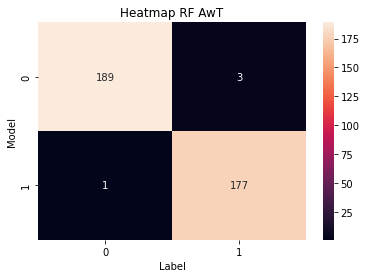

In [141]:
############## R E L E V A N T   C O D E
df = data_encoded
X  = df.copy().drop('AwT', axis = 1)
y  = df['AwT']
#y = [""]
X = X.drop(X.iloc[:,0:1], axis=1)



# Define the threshold
threshold = np.median(y)

# Create a new binary target variable
y_binary = np.where(y < threshold, 0, 1)



X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the model to the data
rf.fit(X_train, y_train)

# Make predictions on new data
y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix
import seaborn as sns



# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
fig = sns.heatmap(cm, annot=True, fmt='d')
fig.set_title("Heatmap RF AwT")
fig.set_ylabel("Model")
fig.set_xlabel("Label")

plt.savefig("./Project_Heatmap_RF_AwT.png")

(1848, 63)
(1848,)
(370, 63)
(370,)
:) Successfully implemented the confusion matrix!
:) Successfully implemented the confusion matrix!
(370, 63)
(370,)
:) Successfully implemented the confusion matrix!
:) Successfully implemented the confusion matrix!
(370, 63)
(370,)
:) Successfully implemented the confusion matrix!
:) Successfully implemented the confusion matrix!
(369, 63)
(369,)
:) Successfully implemented the confusion matrix!
:) Successfully implemented the confusion matrix!
(369, 63)
(369,)
:) Successfully implemented the confusion matrix!
:) Successfully implemented the confusion matrix!


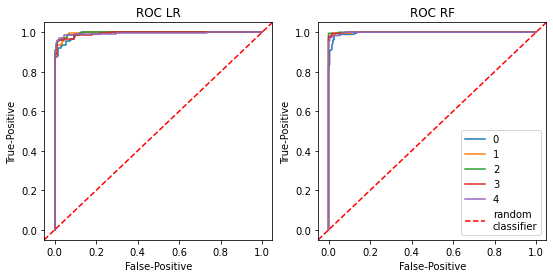

In [142]:
############## R E L E V A N T   C O D E

# Perform a 5-fold stratified crossvalidation 

from sklearn.model_selection import StratifiedKFold

n_splits = 5
skf      = StratifiedKFold(n_splits= n_splits, random_state=None, shuffle=False)


# Prepare the performance overview data frame 
df_performance = pd.DataFrame(columns = ['fold','clf','accuracy','precision','recall',
                                         'specificity','F1','roc_auc'])
df_LR_normcoef = pd.DataFrame(index = X.columns, columns = np.arange(n_splits))



fold = 0
fig,axs = plt.subplots(1,2,figsize=(9, 4))

print(X.shape)
print(y_binary.shape)

# Loop over all splits
for i, (i_train, i_test) in enumerate(skf.split(X, y_binary)):

    # Get the relevant subsets for training and testing
    X_test  = X.iloc[i_test]
    y_test  = y_binary[i_test]
    X_train = X.iloc[i_train]
    y_train = y_binary[i_train]


    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc  = sc.transform(X_test)

    
    print(X_test.shape)
    print(y_test.shape)

    from sklearn.linear_model import LogisticRegression

    # Logistic regression
    clf = LogisticRegression()
    clf.fit(X_train_sc, y_train)

    # Get the importance values
    df_this_LR_coefs = pd.DataFrame(zip(X_train.columns, np.transpose(clf.coef_)), columns=['features', 'coef'])
    norm = sum(abs(df_this_LR_coefs['coef']))
    df_LR_normcoef.loc[:,fold] = df_this_LR_coefs['coef'].values
    df_LR_normcoef.loc[:, fold] = abs(df_LR_normcoef.loc[:, fold])/norm

    from sklearn.ensemble import RandomForestClassifier

    # Random forest
    clf2 = RandomForestClassifier()
    ### Fit
    clf2.fit(X_train_sc, y_train)


    # Evaluate your classifiers 
    eval_metrics = evaluation_metrics(clf, y_test, X_test_sc, axs[0],legend_entry=str(fold))
    df_performance.loc[len(df_performance),:] = [fold,'LR']+eval_metrics

    eval_metrics_RF = evaluation_metrics(clf2, y_test, X_test_sc, axs[1],legend_entry=str(fold))
    df_performance.loc[len(df_performance), :] = [fold, 'RF'] + eval_metrics_RF

    # increase counter for folds
    fold += 1

model_names = ["ROC LR", "ROC RF"]
for i,ax in enumerate(axs):
    ax.set_xlabel("False-Positive")
    ax.set_ylabel("True-Positive")
    add_identity(ax, color="r", ls="--",label = 'random\nclassifier')

    ax.set_title(model_names[i])

    plt.legend()
    
plt.savefig("./Project_ROC_LRandRF_AwT.png")

RF accuracy mean: 0.9848487511902146
RF accuracy std: 0.005920865136613865
RF precision mean: 0.9902397306604879
RF precision std: 0.010313993425905778
RF recall mean: 0.9794300822561693
RF recall std: 0.004575323758872001
RF specificity mean: 0.9902643948296121
RF specificity std: 0.010394458255952449
RF F1 mean: 0.9847818445569393
RF F1 std: 0.005879456562105905
RF roc_auc mean: 0.9986157938196717
RF roc_auc std: 0.0013561320364509867
(63, 7)


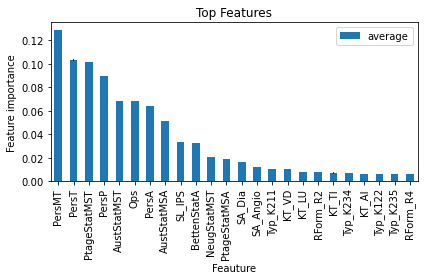

In [143]:
############## R E L E V A N T   C O D E
for col in ['accuracy', 'precision', 'recall', 'specificity', 'F1','roc_auc']:
    #print('LR', col, 'mean:', df_performance.loc[::2, col].mean())
    #print('LR', col, 'std:', df_performance.loc[::2, col].std())
    print('RF', col, 'mean:', df_performance.loc[::-2, col].mean())
    print('RF', col, 'std:', df_performance.loc[::-2, col].std())

# Average the feature importance across the five folds and sort them

std_per_row = df_LR_normcoef.std(axis=1)

#print(df_LR_normcoef)
df_LR_normcoef['std'] = std_per_row
df_LR_normcoef['average'] = 0
#print(df_LR_normcoef)

print(df_LR_normcoef.shape)



for index in df_LR_normcoef:
        df_LR_normcoef['average'] = df_LR_normcoef.iloc[:, 0:5].mean(axis=1)
                
df_LR_normcoef = df_LR_normcoef.sort_values('average', ascending=False)

#print(df_LR_normcoef)

df_LR_normcoef_25= df_LR_normcoef.drop(index=df_LR_normcoef.index[-39:])
ax= df_LR_normcoef_25.plot(kind='bar', xerr = 'std')


ax.set_xlabel('Feauture')
ax.set_ylabel('Feature importance')
ax.set_title('Top Features')
plt.tight_layout()

plt.legend()

plt.savefig("./Project_feature_importance_AwT.png")

In [144]:
y.nlargest(15)


3615    2.151834e+09
3337    2.030025e+09
3053    1.942119e+09
2774    1.902176e+09
2491    1.843346e+09
3719    1.809603e+09
2203    1.783969e+09
3162    1.762432e+09
2600    1.755923e+09
2881    1.744640e+09
3443    1.715086e+09
1915    1.706840e+09
2309    1.635465e+09
2021    1.543435e+09
3755    1.501242e+09
Name: AwT, dtype: float64

In [145]:
X.loc[3615]

PtageStatMST    559587.000000
AustStatMST      52012.000000
NeugStatMST       3137.000000
Ops                 42.000000
Gebs                11.000000
PersA             2034.890000
PersP             5020.780000
PersMT            1177.050000
PersT            11833.030000
PtageStatMSA    324524.000000
AustStatMSA      43066.000000
BettenStatA       1114.040984
SL_IPS               1.000000
SA_Angio             1.000000
SA_CC                1.000000
SA_Dia               1.000000
SA_LB                1.000000
SA_Lito              1.000000
SA_PET               1.000000
Typ_K111             1.000000
KT_AG                0.000000
KT_AI                0.000000
KT_AR                0.000000
KT_BE                0.000000
KT_BL                0.000000
KT_BS                0.000000
KT_FR                0.000000
KT_GE                1.000000
KT_GL                0.000000
KT_GR                0.000000
KT_JU                0.000000
KT_LU                0.000000
KT_NE                0.000000
KT_NW     